<h1><center> INTRODUCTION TO AUTOKERAS </center></h1>
<h2><center> THE MOST ACCESSIBLE DEEP EVOLUTION API </center></h2>

## 1. SOURCE


**Haifeng Jin, Qingquan Song and Xia Hu (2019), `Auto-Keras: An Efficient Neural Architecture Search System`** to be found at:
https://www.kdd.org/kdd2019/accepted-papers/view/auto-keras-an-efficient-neural-architecture-search-system

Neural architecture search (NAS) has been proposed to automatically tune deep neural networks, but existing search algorithms, e.g., NASNet, PNAS, usually suffer from expensive computational cost. Network morphism, which keeps the functionality of a neural network while changing its neural architecture, could be helpful for NAS by enabling more efficient training during the search. In this paper, we propose a novel framework enabling Bayesian optimization to guide the network morphism for efficient neural architecture search. The framework develops a neural network kernel and a tree-structured acquisition function optimization algorithm to efficiently explores the search space. Extensive experiments on real-world benchmark datasets have been done to demonstrate the superior performance of the developed framework over the state-of-the-art methods. Moreover, we build an open-source AutoML system based on our method, namely Auto-Keras. The code and documentation are available at https://autokeras.com. The system runs in parallel on CPU and GPU, with an adaptive search strategy for different GPU memory limits.

## 2. A NOTE ON SAVING KERAS OUTCOME

See **Brownlee, J. (2019) `Your First Deep Learning Project in Python with Keras Step-By-Step`** , to be found at:

https://machinelearningmastery.com/save-load-keras-deep-learning-models/
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/    

### FRAMEWORK

Keras separates the concerns of saving your model architecture and saving your model weights.

Model weights are saved to HDF5 format. This is a grid format that is ideal for storing multi-dimensional arrays of numbers.

The model structure can be described and saved using two different formats: JSON and YAML.

In this post we are going to look at two examples of saving and loading your model to file:

> - Save Model to JSON.
> - Save Model to YAML.
Each example will also demonstrate saving and loading your model weights to HDF5 formatted files.

The examples will use the same simple network trained on the Pima Indians onset of diabetes binary classification dataset. This is a small dataset that contains all numerical data and is easy to work with. You can download this dataset and place it in your working directory with the filename “pima-indians-diabetes.csv” (update: download from here).

Confirm that you have the latest version of Keras installed (e.g. v2.2.4 as of May 2019).

Note: Saving models requires that you have the h5py library installed:

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

In [17]:
#MLP for Pima Indians Dataset saved to single file
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense
# load pima indians dataset
dataset = loadtxt("pima-indians-diabetes.csv", delimiter=",")
# split into input (X) and output (Y) variables
X = dataset[:,0:8]
Y = dataset[:,8]
# define model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
model.fit(X, Y, epochs=150, batch_size=10, verbose=0)
# evaluate the model
scores = model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 77.21%


### SAVING THE MODEL

In [18]:
model.save("model.h5")
print("Saved model to disk")

Saved model to disk


### LOADING THE MODEL

Your saved model can then be loaded later by calling the load_model() function and passing the filename. The function returns the model with the same architecture and weights.

In this case, we load the model, summarize the architecture and evaluate it on the same dataset to confirm the weights and architecture are the same.

In [19]:
new_model=load_model('model.h5')

In [20]:
new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 9         
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


### VISUALIZING THE RESULTS

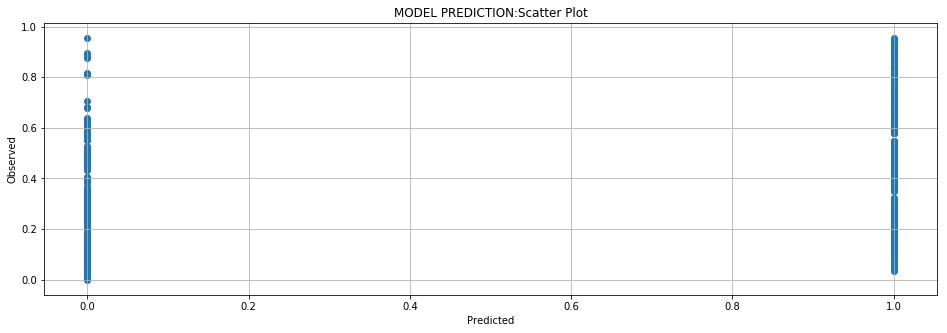

In [13]:
m=new_model.predict(X)
o=(Y)
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
plt.scatter(Y,m)
plt.grid()
plt.title("MODEL PREDICTION:Scatter Plot")
plt.xlabel("Predicted")
plt.ylabel("Observed")
plt.show()

## 3. GETTING STARTED WITH AUTOKERAS

**Rowan, I (2017). `Harness the power of Neural Architecture Search with a few lines of code`** to be found at : https://towardsdatascience.com/getting-started-with-autokeras-8c5332b829

One of the most powerful upcoming concepts which I wrote about in The State of AI in 2020 is Neural Architecture Search(NAS). There is plenty to know about NAS, but to understand this tutorial I will only summarize. In short, NAS is essentially a method to take the limitations of human design out of Neural Network architectures. To accomplish this, many different architectures are considered in parallel, trained, and evaluated. Following this each may be adjusted based on a selected algorithm to try another architecture. The end result is a sort of gradient descent of the model loss across each model attempted(Can be thousands!), instead of each step. The model that performed best is the winner and the Data Scientist can sleep well at night knowing they likely aren’t using an inferior algorithm.

Go to **`Efficient Neural Architecture Search (ENAS) in PyTorch`** .See animation at: https://github.com/carpedm20/ENAS-pytorch

To pull off a successful NAS in the past, very complicated implementations of Tensorflow, PyTorch or Keras scripts were required. Aside from this, compute hardware requirements where enterprise level. Enter AutoKeras. The Data Analytics at Texas A&M Lab developed an open source framework built with Keras to bring NAS to any avid Keras + python user. Version 1.0 was just released in January 2019 following a year of pre-release versions as well, making it ready to go out to the wild. This is a great tool for young data scientists and small companies especially, as it allows for them to keep up with this technique which large competitors swear to.

The library uses state-of-the-art NAS algorithms, along with existing preprocessing blocks to insure smooth NAS trainings sessions. This is laid out extensively in the AutoKeras Paper. Part of what makes this very exciting for small research operations is the fact that they have optimized the algorithms for dynamic GPU memories to avoid the evil OOM Exceptions we are all used to. Given all of this, AutoKeras comes pre-packaged with the following capabilities:

> - Image Classification/Regression
> - Text Classification/Regression
> - Structured DataClassification/Regression(Typical row x column datatypes)
> - Multi-Task Learning

We could start with a brief walkthrough of setup and easy implementations and then go further into depth on custom implementations and the concept of “Blocks”

In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
    
restartkernel()

If your only goal is to train the best architecture for a classification task the code is rather minimal. Using the built-in mnist dataset you could load as follows

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense
from numpy import loadtxt
from tensorflow.keras.datasets import mnist
import autokeras as ak

D:\Program Files\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Now that we have the data we want to fit we can create the ImageClassifier object:

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
model = ak.ImageClassifier(max_trials =1)

This creates the structure for our training session. The max_trials refer to how many different models will be attempted. AutoKeras has implemented models like ResNet, Xception, and separable CNNs, which are bound to be powerful.
Following this, we will need to fit the model. 

The incredibly complex and long process, depending on your hardware, can be triggered with:

In [4]:
model.fit(x_train, y_train, epochs=1, validation_split=0.8)

Train for 375 steps, validate for 1500 steps
233/375 [=================>............] - ETA: 7:22 - loss: 2.3750 - accuracy: 0.15 - ETA: 3:50 - loss: 2.3627 - accuracy: 0.15 - ETA: 2:39 - loss: 2.2987 - accuracy: 0.20 - ETA: 1:42 - loss: 2.1856 - accuracy: 0.26 - ETA: 1:28 - loss: 2.1619 - accuracy: 0.29 - ETA: 1:18 - loss: 2.0754 - accuracy: 0.35 - ETA: 1:10 - loss: 2.0260 - accuracy: 0.36 - ETA: 1:04 - loss: 2.0019 - accuracy: 0.38 - ETA: 55s - loss: 1.8731 - accuracy: 0.4574 - ETA: 52s - loss: 1.8174 - accuracy: 0.484 - ETA: 49s - loss: 1.7579 - accuracy: 0.509 - ETA: 47s - loss: 1.7037 - accuracy: 0.526 - ETA: 45s - loss: 1.6486 - accuracy: 0.539 - ETA: 43s - loss: 1.6342 - accuracy: 0.539 - ETA: 40s - loss: 1.5573 - accuracy: 0.555 - ETA: 39s - loss: 1.5294 - accuracy: 0.557 - ETA: 36s - loss: 1.4945 - accuracy: 0.559 - ETA: 35s - loss: 1.4573 - accuracy: 0.571 - ETA: 35s - loss: 1.4341 - accuracy: 0.577 - ETA: 34s - loss: 1.4033 - accuracy: 0.583 - ETA: 32s - loss: 1.3386 - accur

INFO:tensorflow:Oracle triggered exit
Train for 1875 steps, validate for 1500 steps


 228/1875 [==>...........................] - ETA: 38:11 - loss: 2.4305 - accuracy: 0.062 - ETA: 19:52 - loss: 2.3743 - accuracy: 0.093 - ETA: 10:43 - loss: 2.2354 - accuracy: 0.179 - ETA: 8:55 - loss: 2.2009 - accuracy: 0.218 - ETA: 7:41 - loss: 2.1868 - accuracy: 0.22 - ETA: 6:50 - loss: 2.1122 - accuracy: 0.27 - ETA: 6:11 - loss: 2.0857 - accuracy: 0.29 - ETA: 5:41 - loss: 2.0577 - accuracy: 0.30 - ETA: 4:55 - loss: 1.9433 - accuracy: 0.37 - ETA: 4:38 - loss: 1.8826 - accuracy: 0.41 - ETA: 4:24 - loss: 1.8303 - accuracy: 0.43 - ETA: 4:02 - loss: 1.7113 - accuracy: 0.48 - ETA: 3:52 - loss: 1.6909 - accuracy: 0.49 - ETA: 3:36 - loss: 1.6024 - accuracy: 0.52 - ETA: 3:24 - loss: 1.5535 - accuracy: 0.52 - ETA: 3:19 - loss: 1.5354 - accuracy: 0.52 - ETA: 3:09 - loss: 1.4837 - accuracy: 0.54 - ETA: 3:04 - loss: 1.4579 - accuracy: 0.55 - ETA: 3:01 - loss: 1.4340 - accuracy: 0.55 - ETA: 2:54 - loss: 1.3715 - accuracy: 0.57 - ETA: 2:51 - loss: 1.3523 - accuracy: 0.58 - ETA: 2:48 - loss: 1.3345

1049/1875 [===============>..............] - ETA: 56s - loss: 0.2345 - accuracy: 0.929 - ETA: 56s - loss: 0.2342 - accuracy: 0.929 - ETA: 56s - loss: 0.2340 - accuracy: 0.929 - ETA: 56s - loss: 0.2337 - accuracy: 0.929 - ETA: 56s - loss: 0.2335 - accuracy: 0.929 - ETA: 56s - loss: 0.2333 - accuracy: 0.929 - ETA: 56s - loss: 0.2331 - accuracy: 0.929 - ETA: 56s - loss: 0.2330 - accuracy: 0.929 - ETA: 56s - loss: 0.2328 - accuracy: 0.930 - ETA: 56s - loss: 0.2326 - accuracy: 0.930 - ETA: 56s - loss: 0.2324 - accuracy: 0.930 - ETA: 56s - loss: 0.2322 - accuracy: 0.930 - ETA: 56s - loss: 0.2318 - accuracy: 0.930 - ETA: 55s - loss: 0.2317 - accuracy: 0.930 - ETA: 55s - loss: 0.2316 - accuracy: 0.930 - ETA: 55s - loss: 0.2315 - accuracy: 0.930 - ETA: 55s - loss: 0.2313 - accuracy: 0.930 - ETA: 55s - loss: 0.2313 - accuracy: 0.930 - ETA: 55s - loss: 0.2311 - accuracy: 0.930 - ETA: 55s - loss: 0.2310 - accuracy: 0.930 - ETA: 55s - loss: 0.2308 - accuracy: 0.930 - ETA: 55s - loss: 0.2306 - accur

1262/1875 [===================>..........] - ETA: 45s - loss: 0.2099 - accuracy: 0.936 - ETA: 45s - loss: 0.2097 - accuracy: 0.936 - ETA: 45s - loss: 0.2095 - accuracy: 0.936 - ETA: 45s - loss: 0.2094 - accuracy: 0.936 - ETA: 44s - loss: 0.2092 - accuracy: 0.936 - ETA: 44s - loss: 0.2091 - accuracy: 0.936 - ETA: 44s - loss: 0.2091 - accuracy: 0.936 - ETA: 44s - loss: 0.2090 - accuracy: 0.936 - ETA: 44s - loss: 0.2088 - accuracy: 0.937 - ETA: 44s - loss: 0.2086 - accuracy: 0.937 - ETA: 44s - loss: 0.2085 - accuracy: 0.937 - ETA: 44s - loss: 0.2083 - accuracy: 0.937 - ETA: 44s - loss: 0.2082 - accuracy: 0.937 - ETA: 44s - loss: 0.2081 - accuracy: 0.937 - ETA: 44s - loss: 0.2080 - accuracy: 0.937 - ETA: 44s - loss: 0.2076 - accuracy: 0.937 - ETA: 44s - loss: 0.2075 - accuracy: 0.937 - ETA: 44s - loss: 0.2073 - accuracy: 0.937 - ETA: 44s - loss: 0.2072 - accuracy: 0.937 - ETA: 44s - loss: 0.2070 - accuracy: 0.937 - ETA: 43s - loss: 0.2068 - accuracy: 0.937 - ETA: 43s - loss: 0.2067 - accur

1465/1875 [======================>.......] - ETA: 33s - loss: 0.1929 - accuracy: 0.941 - ETA: 33s - loss: 0.1928 - accuracy: 0.941 - ETA: 33s - loss: 0.1926 - accuracy: 0.941 - ETA: 33s - loss: 0.1924 - accuracy: 0.942 - ETA: 33s - loss: 0.1923 - accuracy: 0.942 - ETA: 32s - loss: 0.1923 - accuracy: 0.941 - ETA: 32s - loss: 0.1922 - accuracy: 0.942 - ETA: 32s - loss: 0.1921 - accuracy: 0.942 - ETA: 32s - loss: 0.1919 - accuracy: 0.942 - ETA: 32s - loss: 0.1918 - accuracy: 0.942 - ETA: 32s - loss: 0.1918 - accuracy: 0.942 - ETA: 32s - loss: 0.1916 - accuracy: 0.942 - ETA: 32s - loss: 0.1917 - accuracy: 0.942 - ETA: 32s - loss: 0.1915 - accuracy: 0.942 - ETA: 32s - loss: 0.1915 - accuracy: 0.942 - ETA: 32s - loss: 0.1915 - accuracy: 0.942 - ETA: 32s - loss: 0.1914 - accuracy: 0.942 - ETA: 32s - loss: 0.1913 - accuracy: 0.942 - ETA: 32s - loss: 0.1913 - accuracy: 0.942 - ETA: 32s - loss: 0.1912 - accuracy: 0.942 - ETA: 32s - loss: 0.1909 - accuracy: 0.942 - ETA: 31s - loss: 0.1909 - accur

1686/1875 [=========================>....] - ETA: 22s - loss: 0.1795 - accuracy: 0.945 - ETA: 22s - loss: 0.1794 - accuracy: 0.945 - ETA: 22s - loss: 0.1793 - accuracy: 0.945 - ETA: 22s - loss: 0.1792 - accuracy: 0.945 - ETA: 22s - loss: 0.1792 - accuracy: 0.945 - ETA: 22s - loss: 0.1792 - accuracy: 0.945 - ETA: 21s - loss: 0.1791 - accuracy: 0.945 - ETA: 21s - loss: 0.1790 - accuracy: 0.945 - ETA: 21s - loss: 0.1789 - accuracy: 0.945 - ETA: 21s - loss: 0.1788 - accuracy: 0.945 - ETA: 21s - loss: 0.1787 - accuracy: 0.945 - ETA: 21s - loss: 0.1788 - accuracy: 0.945 - ETA: 21s - loss: 0.1788 - accuracy: 0.945 - ETA: 21s - loss: 0.1787 - accuracy: 0.945 - ETA: 21s - loss: 0.1787 - accuracy: 0.945 - ETA: 21s - loss: 0.1787 - accuracy: 0.945 - ETA: 21s - loss: 0.1787 - accuracy: 0.945 - ETA: 21s - loss: 0.1786 - accuracy: 0.945 - ETA: 21s - loss: 0.1787 - accuracy: 0.945 - ETA: 21s - loss: 0.1786 - accuracy: 0.945 - ETA: 21s - loss: 0.1785 - accuracy: 0.945 - ETA: 21s - loss: 0.1785 - accur

1875/1875 [==============================] - ETA: 10s - loss: 0.1698 - accuracy: 0.948 - ETA: 10s - loss: 0.1698 - accuracy: 0.948 - ETA: 10s - loss: 0.1697 - accuracy: 0.948 - ETA: 10s - loss: 0.1697 - accuracy: 0.948 - ETA: 9s - loss: 0.1696 - accuracy: 0.948 - ETA: 9s - loss: 0.1695 - accuracy: 0.94 - ETA: 9s - loss: 0.1693 - accuracy: 0.94 - ETA: 9s - loss: 0.1693 - accuracy: 0.94 - ETA: 9s - loss: 0.1692 - accuracy: 0.94 - ETA: 9s - loss: 0.1691 - accuracy: 0.94 - ETA: 9s - loss: 0.1690 - accuracy: 0.94 - ETA: 9s - loss: 0.1690 - accuracy: 0.94 - ETA: 9s - loss: 0.1688 - accuracy: 0.94 - ETA: 9s - loss: 0.1687 - accuracy: 0.94 - ETA: 9s - loss: 0.1687 - accuracy: 0.94 - ETA: 9s - loss: 0.1686 - accuracy: 0.94 - ETA: 9s - loss: 0.1686 - accuracy: 0.94 - ETA: 9s - loss: 0.1685 - accuracy: 0.94 - ETA: 9s - loss: 0.1684 - accuracy: 0.94 - ETA: 8s - loss: 0.1683 - accuracy: 0.94 - ETA: 8s - loss: 0.1682 - accuracy: 0.94 - ETA: 8s - loss: 0.1682 - accuracy: 0.94 - ETA: 8s - loss: 0.1681

In [5]:
u=model.predict(x_train)

In [6]:
loss, acc = model.evaluate(x_test, y_test, verbose=0)

In [7]:
acc

0.9721

In [8]:
loss

0.08150846712332525

In [9]:
m=model.export_model()

In [10]:
m.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
normalization (Normalization (None, 28, 28, 1)         3         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0     

In [11]:
import matplotlib.pyplot as plt
u=model.predict(x_train)

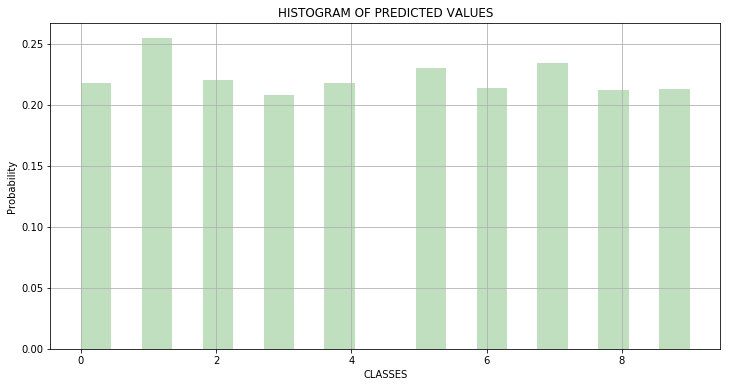

In [12]:
plt.figure(figsize=(12,6))
n, bins, patches = plt.hist(u, 20, density=1, facecolor='g', alpha = 0.25, lw=3 )
plt.xlabel('CLASSES')
plt.ylabel('Probability')
plt.title('HISTOGRAM OF PREDICTED VALUES')
#plt.text(5, .25, 'type of object')
plt.grid(True)
plt.show()

## 4. TITANIC SURVIVAL MODEL

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

In [ ]:
from IPython.display import display_html
def restartkernel() :
    display_html("<script>Jupyter.notebook.kernel.restart()</script>",raw=True)
    
restartkernel()

In [1]:
import autokeras as ak

# Initialize the classifier.
clf = ak.StructuredDataClassifier(max_trials=30)
# x is the path to the csv file. y is the column name of the column to predict.
clf.fit(x='train.csv', y='survived')
# Evaluate the accuracy of the found model.
print('Accuracy: {accuracy}'.format(
    accuracy=clf.evaluate(x='eval.csv', y='survived')))

D:\Program Files\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 10s - loss: 1.5938 - accuracy: 0.500 - 1s 69ms/step - loss: 0.8055 - accuracy: 0.5996 - val_loss: 0.7250 - val_accuracy: 0.4560
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 0.6527 - accuracy: 0.50 - 0s 14ms/step - loss: 0.6703 - accuracy: 0.6295 - val_loss: 0.5501 - val_accuracy: 0.7440
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.7818 - accuracy: 0.56 - 0s 4ms/step - loss: 0.6798 - accuracy: 0.6554 - val_loss: 0.5997 - val_accuracy: 0.7200
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.7973 - accuracy: 0.53 - 0s 5ms/step - loss: 0.6879 - accuracy: 0.6454 - val_loss: 0.5850 - val_accuracy: 0.7200
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.8320 - accuracy: 0.53 - 0s 6ms/step - loss: 0.6648 - accuracy: 0.6454 - val_loss: 0.5582 - val_accuracy: 0.7280
Epoch 6/1000
16/16 [===============

16/16 [==============================] - ETA: 0s - loss: 0.5385 - accuracy: 0.71 - 0s 6ms/step - loss: 0.4594 - accuracy: 0.7948 - val_loss: 0.3975 - val_accuracy: 0.8320
Epoch 89/1000
16/16 [==============================] - ETA: 0s - loss: 0.5383 - accuracy: 0.71 - 0s 6ms/step - loss: 0.4597 - accuracy: 0.7988 - val_loss: 0.3942 - val_accuracy: 0.8320
Epoch 90/1000
16/16 [==============================] - ETA: 0s - loss: 0.5378 - accuracy: 0.71 - 0s 6ms/step - loss: 0.4585 - accuracy: 0.7948 - val_loss: 0.3941 - val_accuracy: 0.8320
Epoch 91/1000
16/16 [==============================] - ETA: 0s - loss: 0.5348 - accuracy: 0.71 - 0s 6ms/step - loss: 0.4572 - accuracy: 0.7948 - val_loss: 0.3951 - val_accuracy: 0.8320
Epoch 92/1000
16/16 [==============================] - ETA: 0s - loss: 0.5333 - accuracy: 0.71 - 0s 5ms/step - loss: 0.4573 - accuracy: 0.7928 - val_loss: 0.3932 - val_accuracy: 0.8320
Epoch 93/1000
16/16 [==============================] - ETA: 0s - loss: 0.5360 - accuracy:

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 8s - loss: 0.9307 - accuracy: 0.53 - 1s 58ms/step - loss: 0.7722 - accuracy: 0.6633 - val_loss: 0.5553 - val_accuracy: 0.7360
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 0.8915 - accuracy: 0.56 - 0s 13ms/step - loss: 0.7070 - accuracy: 0.6733 - val_loss: 0.6286 - val_accuracy: 0.7440
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.7259 - accuracy: 0.65 - 0s 4ms/step - loss: 0.6804 - accuracy: 0.6713 - val_loss: 0.5963 - val_accuracy: 0.7440
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.8326 - accuracy: 0.50 - 0s 3ms/step - loss: 0.6378 - accuracy: 0.6614 - val_loss: 0.5655 - val_accuracy: 0.7440
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.6966 - accuracy: 0.65 - 0s 15ms/step - loss: 0.6098 - accuracy: 0.7012 - val_loss: 0.5186 - val_accuracy: 0.7600
Epoch 6/1000
16/16 [================

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 16s - loss: 0.7542 - accuracy: 0.437 - ETA: 0s - loss: 0.7364 - accuracy: 0.566 - 2s 107ms/step - loss: 0.6852 - accuracy: 0.5936 - val_loss: 0.9642 - val_accuracy: 0.7040
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 0.6999 - accuracy: 0.53 - ETA: 0s - loss: 0.5937 - accuracy: 0.67 - 0s 28ms/step - loss: 0.5879 - accuracy: 0.6892 - val_loss: 0.7590 - val_accuracy: 0.7600
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.5787 - accuracy: 0.65 - ETA: 0s - loss: 0.5420 - accuracy: 0.71 - 0s 10ms/step - loss: 0.5269 - accuracy: 0.7291 - val_loss: 0.6077 - val_accuracy: 0.7440
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.5451 - accuracy: 0.71 - ETA: 0s - loss: 0.5167 - accuracy: 0.75 - ETA: 0s - loss: 0.4922 - accuracy: 0.76 - 0s 10ms/step - loss: 0.4876 - accuracy: 0.7590 - val_loss: 0.5416 - val_accuracy: 0.7600
Epoch

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 10s - loss: 2.5320 - accuracy: 0.500 - 1s 76ms/step - loss: 2.0462 - accuracy: 0.5418 - val_loss: 0.7452 - val_accuracy: 0.7280
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 1.1140 - accuracy: 0.56 - 0s 4ms/step - loss: 1.2425 - accuracy: 0.6394 - val_loss: 0.8926 - val_accuracy: 0.7200
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 2.1612 - accuracy: 0.46 - 0s 18ms/step - loss: 1.3428 - accuracy: 0.5139 - val_loss: 0.5267 - val_accuracy: 0.7360
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 1.0114 - accuracy: 0.53 - 0s 13ms/step - loss: 0.8969 - accuracy: 0.6195 - val_loss: 0.5560 - val_accuracy: 0.7440
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.9911 - accuracy: 0.68 - 0s 5ms/step - loss: 0.8817 - accuracy: 0.6275 - val_loss: 0.7229 - val_accuracy: 0.7360
Epoch 6/1000
16/16 [==============

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 9s - loss: 3.1499 - accuracy: 0.46 - 1s 61ms/step - loss: 1.5734 - accuracy: 0.5578 - val_loss: 1.0151 - val_accuracy: 0.6320
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 1.7979 - accuracy: 0.56 - 0s 12ms/step - loss: 1.0935 - accuracy: 0.6116 - val_loss: 0.5985 - val_accuracy: 0.7360
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.8924 - accuracy: 0.53 - 0s 13ms/step - loss: 0.8443 - accuracy: 0.6116 - val_loss: 0.4703 - val_accuracy: 0.7680
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.9005 - accuracy: 0.56 - 0s 14ms/step - loss: 0.8007 - accuracy: 0.6474 - val_loss: 0.5108 - val_accuracy: 0.7760
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.8011 - accuracy: 0.62 - 0s 11ms/step - loss: 0.7938 - accuracy: 0.6554 - val_loss: 0.5148 - val_accuracy: 0.7840
Epoch 6/1000
16/16 [==============

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 22s - loss: 0.7954 - accuracy: 0.500 - 2s 125ms/step - loss: 0.8581 - accuracy: 0.5000 - val_loss: 0.6511 - val_accuracy: 0.7120
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 0.9256 - accuracy: 0.50 - 0s 4ms/step - loss: 0.8534 - accuracy: 0.4462 - val_loss: 0.6412 - val_accuracy: 0.6960
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 1.2242 - accuracy: 0.31 - 0s 4ms/step - loss: 0.8567 - accuracy: 0.4801 - val_loss: 0.6416 - val_accuracy: 0.6960
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.9857 - accuracy: 0.50 - 0s 4ms/step - loss: 0.8300 - accuracy: 0.5398 - val_loss: 0.6408 - val_accuracy: 0.6960
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.7175 - accuracy: 0.50 - 0s 5ms/step - loss: 0.7589 - accuracy: 0.5279 - val_loss: 0.6376 - val_accuracy: 0.7040
Epoch 6/1000
16/16 [===============

16/16 [==============================] - ETA: 0s - loss: 0.6546 - accuracy: 0.59 - ETA: 0s - loss: 0.6230 - accuracy: 0.64 - 0s 17ms/step - loss: 0.6137 - accuracy: 0.6594 - val_loss: 0.5372 - val_accuracy: 0.8240
Epoch 76/1000
16/16 [==============================] - ETA: 0s - loss: 0.7015 - accuracy: 0.53 - ETA: 0s - loss: 0.6311 - accuracy: 0.65 - 0s 14ms/step - loss: 0.6225 - accuracy: 0.6653 - val_loss: 0.5332 - val_accuracy: 0.8320
Epoch 77/1000
16/16 [==============================] - ETA: 0s - loss: 0.6686 - accuracy: 0.59 - ETA: 0s - loss: 0.6344 - accuracy: 0.67 - 0s 16ms/step - loss: 0.6208 - accuracy: 0.6773 - val_loss: 0.5384 - val_accuracy: 0.8400
Epoch 78/1000
16/16 [==============================] - ETA: 0s - loss: 0.6646 - accuracy: 0.65 - ETA: 0s - loss: 0.6171 - accuracy: 0.65 - 0s 7ms/step - loss: 0.6221 - accuracy: 0.6494 - val_loss: 0.5465 - val_accuracy: 0.7680
Epoch 79/1000
16/16 [==============================] - ETA: 0s - loss: 0.8126 - accuracy: 0.50 - ETA: 0

Epoch 114/1000
16/16 [==============================] - ETA: 0s - loss: 0.7461 - accuracy: 0.62 - ETA: 0s - loss: 0.6049 - accuracy: 0.70 - 0s 7ms/step - loss: 0.6020 - accuracy: 0.7052 - val_loss: 0.4737 - val_accuracy: 0.8560
Epoch 115/1000
16/16 [==============================] - ETA: 0s - loss: 0.8362 - accuracy: 0.65 - ETA: 0s - loss: 0.6055 - accuracy: 0.71 - 0s 6ms/step - loss: 0.6086 - accuracy: 0.7112 - val_loss: 0.4758 - val_accuracy: 0.8560
Epoch 116/1000
16/16 [==============================] - ETA: 0s - loss: 0.5778 - accuracy: 0.71 - 0s 4ms/step - loss: 0.5809 - accuracy: 0.7092 - val_loss: 0.4884 - val_accuracy: 0.8400
Epoch 117/1000
16/16 [==============================] - ETA: 0s - loss: 0.6650 - accuracy: 0.56 - 0s 4ms/step - loss: 0.5903 - accuracy: 0.7032 - val_loss: 0.4866 - val_accuracy: 0.8400
Epoch 118/1000
16/16 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.71 - 0s 5ms/step - loss: 0.5567 - accuracy: 0.7450 - val_loss: 0.4734 - val_acc

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 9s - loss: 1.4493 - accuracy: 0.53 - 1s 72ms/step - loss: 0.7195 - accuracy: 0.6474 - val_loss: 0.6154 - val_accuracy: 0.7200
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 0.7513 - accuracy: 0.46 - 0s 4ms/step - loss: 0.6777 - accuracy: 0.6394 - val_loss: 0.5559 - val_accuracy: 0.7120
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.7775 - accuracy: 0.53 - 0s 19ms/step - loss: 0.7092 - accuracy: 0.6554 - val_loss: 0.5430 - val_accuracy: 0.7280
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.9088 - accuracy: 0.56 - 0s 4ms/step - loss: 0.7188 - accuracy: 0.6414 - val_loss: 0.6011 - val_accuracy: 0.7120
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.8649 - accuracy: 0.46 - 0s 4ms/step - loss: 0.7123 - accuracy: 0.6275 - val_loss: 0.6217 - val_accuracy: 0.7280
Epoch 6/1000
16/16 [=================

Epoch 45/1000
16/16 [==============================] - ETA: 0s - loss: 0.5822 - accuracy: 0.71 - 0s 3ms/step - loss: 0.4876 - accuracy: 0.7849 - val_loss: 0.4493 - val_accuracy: 0.8000
Epoch 46/1000
16/16 [==============================] - ETA: 0s - loss: 0.5799 - accuracy: 0.71 - 0s 3ms/step - loss: 0.4886 - accuracy: 0.7749 - val_loss: 0.4407 - val_accuracy: 0.8160
Epoch 47/1000
16/16 [==============================] - ETA: 0s - loss: 0.5869 - accuracy: 0.71 - 0s 3ms/step - loss: 0.4880 - accuracy: 0.7729 - val_loss: 0.4373 - val_accuracy: 0.8160
Epoch 48/1000
16/16 [==============================] - ETA: 0s - loss: 0.5934 - accuracy: 0.71 - 0s 4ms/step - loss: 0.4844 - accuracy: 0.7829 - val_loss: 0.4370 - val_accuracy: 0.8080
Epoch 49/1000
16/16 [==============================] - ETA: 0s - loss: 0.5676 - accuracy: 0.71 - 0s 16ms/step - loss: 0.4789 - accuracy: 0.7869 - val_loss: 0.4433 - val_accuracy: 0.8240
Epoch 50/1000
16/16 [==============================] - ETA: 0s - loss: 0.5

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 9s - loss: 2.2536 - accuracy: 0.53 - 1s 61ms/step - loss: 1.8932 - accuracy: 0.5578 - val_loss: 0.6901 - val_accuracy: 0.6800
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 1.5544 - accuracy: 0.53 - 0s 12ms/step - loss: 1.4150 - accuracy: 0.5737 - val_loss: 0.5192 - val_accuracy: 0.7280
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 1.0439 - accuracy: 0.62 - 0s 11ms/step - loss: 1.3169 - accuracy: 0.6375 - val_loss: 0.7177 - val_accuracy: 0.7520
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.9968 - accuracy: 0.59 - 0s 4ms/step - loss: 1.1824 - accuracy: 0.6355 - val_loss: 0.5099 - val_accuracy: 0.7520
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 1.0568 - accuracy: 0.50 - 0s 14ms/step - loss: 1.1568 - accuracy: 0.6175 - val_loss: 0.5013 - val_accuracy: 0.7600
Epoch 6/1000
16/16 [===============

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 17s - loss: 0.7460 - accuracy: 0.500 - ETA: 0s - loss: 0.7454 - accuracy: 0.604 - 2s 99ms/step - loss: 0.7319 - accuracy: 0.6076 - val_loss: 0.5892 - val_accuracy: 0.7280
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 0.9232 - accuracy: 0.43 - ETA: 0s - loss: 0.7404 - accuracy: 0.62 - 0s 6ms/step - loss: 0.7432 - accuracy: 0.6215 - val_loss: 0.6092 - val_accuracy: 0.7120
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.8136 - accuracy: 0.56 - 0s 4ms/step - loss: 0.7723 - accuracy: 0.6076 - val_loss: 0.5948 - val_accuracy: 0.7200
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.8005 - accuracy: 0.50 - 0s 4ms/step - loss: 0.7479 - accuracy: 0.6076 - val_loss: 0.5983 - val_accuracy: 0.7120
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.8583 - accuracy: 0.43 - 0s 4ms/step - loss: 0.7177 - accuracy: 

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 9s - loss: 0.9798 - accuracy: 0.56 - 1s 60ms/step - loss: 1.5889 - accuracy: 0.5797 - val_loss: 0.7977 - val_accuracy: 0.7040
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 1.8266 - accuracy: 0.50 - 0s 11ms/step - loss: 1.3364 - accuracy: 0.5817 - val_loss: 0.5531 - val_accuracy: 0.7360
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 2.0889 - accuracy: 0.43 - 0s 4ms/step - loss: 1.4593 - accuracy: 0.5936 - val_loss: 0.5873 - val_accuracy: 0.7360
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 1.0174 - accuracy: 0.53 - 0s 11ms/step - loss: 1.2430 - accuracy: 0.5996 - val_loss: 0.5477 - val_accuracy: 0.7440
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 1.1907 - accuracy: 0.65 - ETA: 0s - loss: 1.1092 - accuracy: 0.64 - 0s 7ms/step - loss: 1.0630 - accuracy: 0.6454 - val_loss: 0.4679 - val_accuracy: 0

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 11s - loss: 1.0575 - accuracy: 0.375 - 1s 74ms/step - loss: 0.8011 - accuracy: 0.5916 - val_loss: 0.7006 - val_accuracy: 0.6240
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 0.9699 - accuracy: 0.53 - 0s 5ms/step - loss: 0.6511 - accuracy: 0.6554 - val_loss: 0.7825 - val_accuracy: 0.3600
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.7477 - accuracy: 0.46 - 0s 13ms/step - loss: 0.6731 - accuracy: 0.6554 - val_loss: 0.6438 - val_accuracy: 0.6880
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.6243 - accuracy: 0.59 - ETA: 0s - loss: 0.6569 - accuracy: 0.69 - 0s 13ms/step - loss: 0.6559 - accuracy: 0.6912 - val_loss: 0.6048 - val_accuracy: 0.7440
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.6988 - accuracy: 0.50 - ETA: 0s - loss: 0.6082 - accuracy: 0.72 - 0s 17ms/step - loss: 0.5928 - accuracy

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 15s - loss: 0.7800 - accuracy: 0.593 - 2s 95ms/step - loss: 0.7235 - accuracy: 0.5199 - val_loss: 0.8674 - val_accuracy: 0.2960
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 0.6856 - accuracy: 0.50 - 0s 19ms/step - loss: 0.6740 - accuracy: 0.6394 - val_loss: 0.7180 - val_accuracy: 0.3360
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.6755 - accuracy: 0.53 - 0s 20ms/step - loss: 0.6472 - accuracy: 0.6534 - val_loss: 0.6705 - val_accuracy: 0.6080
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.6756 - accuracy: 0.56 - 0s 16ms/step - loss: 0.6326 - accuracy: 0.6633 - val_loss: 0.6295 - val_accuracy: 0.6960
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.6762 - accuracy: 0.56 - 0s 12ms/step - loss: 0.6233 - accuracy: 0.6693 - val_loss: 0.6004 - val_accuracy: 0.7200
Epoch 6/1000
16/16 [============

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 18s - loss: 0.8866 - accuracy: 0.468 - ETA: 0s - loss: 0.8585 - accuracy: 0.570 - 2s 100ms/step - loss: 0.8419 - accuracy: 0.5717 - val_loss: 0.6259 - val_accuracy: 0.7040
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 1.0043 - accuracy: 0.56 - ETA: 0s - loss: 0.7325 - accuracy: 0.64 - 0s 6ms/step - loss: 0.7343 - accuracy: 0.6355 - val_loss: 0.6672 - val_accuracy: 0.6000
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.7374 - accuracy: 0.65 - 0s 5ms/step - loss: 0.7358 - accuracy: 0.6215 - val_loss: 0.6594 - val_accuracy: 0.6720
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.7065 - accuracy: 0.56 - 0s 12ms/step - loss: 0.7067 - accuracy: 0.6414 - val_loss: 0.6478 - val_accuracy: 0.7520
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.8203 - accuracy: 0.56 - ETA: 0s - loss: 0.6990 - accuracy: 0.

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 10s - loss: 3.4060 - accuracy: 0.531 - 1s 66ms/step - loss: 2.0410 - accuracy: 0.5737 - val_loss: 0.6179 - val_accuracy: 0.7120
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 2.8108 - accuracy: 0.43 - 0s 11ms/step - loss: 1.6353 - accuracy: 0.5777 - val_loss: 0.5799 - val_accuracy: 0.7200
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 1.6443 - accuracy: 0.40 - 0s 12ms/step - loss: 1.8359 - accuracy: 0.5896 - val_loss: 0.5946 - val_accuracy: 0.7360
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 1.7736 - accuracy: 0.56 - 0s 12ms/step - loss: 1.6580 - accuracy: 0.6355 - val_loss: 0.5057 - val_accuracy: 0.7440
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.8121 - accuracy: 0.65 - 0s 5ms/step - loss: 1.2784 - accuracy: 0.6135 - val_loss: 0.5564 - val_accuracy: 0.7360
Epoch 6/1000
16/16 [=============

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 10s - loss: 1.0594 - accuracy: 0.562 - 1s 64ms/step - loss: 1.1463 - accuracy: 0.5538 - val_loss: 0.7009 - val_accuracy: 0.6640
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 1.0914 - accuracy: 0.53 - 0s 11ms/step - loss: 0.9470 - accuracy: 0.6016 - val_loss: 0.6256 - val_accuracy: 0.7360
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 1.3097 - accuracy: 0.50 - 0s 4ms/step - loss: 0.9370 - accuracy: 0.5936 - val_loss: 0.5139 - val_accuracy: 0.7360
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.8817 - accuracy: 0.62 - 0s 15ms/step - loss: 0.9470 - accuracy: 0.6016 - val_loss: 0.5715 - val_accuracy: 0.7440
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.8827 - accuracy: 0.53 - 0s 4ms/step - loss: 0.9104 - accuracy: 0.6275 - val_loss: 0.5154 - val_accuracy: 0.7440
Epoch 6/1000
16/16 [==============

Epoch 43/1000
16/16 [==============================] - ETA: 0s - loss: 0.7505 - accuracy: 0.65 - ETA: 0s - loss: 0.5453 - accuracy: 0.74 - 0s 14ms/step - loss: 0.5346 - accuracy: 0.7530 - val_loss: 0.4240 - val_accuracy: 0.8320
Epoch 44/1000
16/16 [==============================] - ETA: 0s - loss: 0.5724 - accuracy: 0.68 - 0s 4ms/step - loss: 0.5131 - accuracy: 0.7709 - val_loss: 0.4441 - val_accuracy: 0.8160
Epoch 45/1000
16/16 [==============================] - ETA: 0s - loss: 0.5949 - accuracy: 0.68 - 0s 4ms/step - loss: 0.5426 - accuracy: 0.7590 - val_loss: 0.4139 - val_accuracy: 0.8240
Epoch 46/1000
16/16 [==============================] - ETA: 0s - loss: 0.6422 - accuracy: 0.71 - 0s 4ms/step - loss: 0.5130 - accuracy: 0.7689 - val_loss: 0.4157 - val_accuracy: 0.8160
Epoch 47/1000
16/16 [==============================] - ETA: 0s - loss: 0.6803 - accuracy: 0.62 - 0s 4ms/step - loss: 0.4974 - accuracy: 0.7809 - val_loss: 0.4214 - val_accuracy: 0.8160
Epoch 48/1000
16/16 [===========

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 22s - loss: 0.7031 - accuracy: 0.500 - ETA: 1s - loss: 0.8547 - accuracy: 0.576 - 2s 123ms/step - loss: 0.8447 - accuracy: 0.5737 - val_loss: 0.6723 - val_accuracy: 0.3360
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 0.8497 - accuracy: 0.46 - ETA: 0s - loss: 0.8287 - accuracy: 0.56 - 0s 14ms/step - loss: 0.8212 - accuracy: 0.5777 - val_loss: 0.6480 - val_accuracy: 0.7360
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.9673 - accuracy: 0.59 - ETA: 0s - loss: 0.8046 - accuracy: 0.57 - ETA: 0s - loss: 0.8315 - accuracy: 0.57 - 0s 11ms/step - loss: 0.8202 - accuracy: 0.5777 - val_loss: 0.6681 - val_accuracy: 0.6560
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.8191 - accuracy: 0.53 - ETA: 0s - loss: 0.8735 - accuracy: 0.55 - ETA: 0s - loss: 0.8473 - accuracy: 0.55 - 0s 11ms/step - loss: 0.8305 - accuracy: 0.5558 - val

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 22s - loss: 0.7373 - accuracy: 0.562 - ETA: 1s - loss: 0.6890 - accuracy: 0.621 - 2s 128ms/step - loss: 0.7308 - accuracy: 0.6375 - val_loss: 0.7833 - val_accuracy: 0.3520
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 0.8764 - accuracy: 0.50 - ETA: 0s - loss: 0.7920 - accuracy: 0.60 - 0s 19ms/step - loss: 0.7853 - accuracy: 0.6056 - val_loss: 0.7077 - val_accuracy: 0.3680
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.7315 - accuracy: 0.56 - ETA: 0s - loss: 0.7174 - accuracy: 0.59 - ETA: 0s - loss: 0.6878 - accuracy: 0.65 - 0s 24ms/step - loss: 0.7112 - accuracy: 0.6394 - val_loss: 0.7578 - val_accuracy: 0.7200
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.6020 - accuracy: 0.62 - ETA: 0s - loss: 0.6149 - accuracy: 0.65 - ETA: 0s - loss: 0.6776 - accuracy: 0.65 - 0s 12ms/step - loss: 0.6846 - accuracy: 0.6574 - val

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 8s - loss: 4.3956 - accuracy: 0.59 - 1s 56ms/step - loss: 3.4976 - accuracy: 0.4880 - val_loss: 0.7243 - val_accuracy: 0.7120
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 4.1930 - accuracy: 0.46 - 0s 10ms/step - loss: 2.8100 - accuracy: 0.5578 - val_loss: 0.7185 - val_accuracy: 0.7200
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 4.2111 - accuracy: 0.53 - 0s 4ms/step - loss: 2.5138 - accuracy: 0.5478 - val_loss: 0.7115 - val_accuracy: 0.7120
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 2.9861 - accuracy: 0.62 - 0s 3ms/step - loss: 2.3797 - accuracy: 0.5916 - val_loss: 0.6798 - val_accuracy: 0.7200
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 2.2633 - accuracy: 0.40 - 0s 5ms/step - loss: 2.3033 - accuracy: 0.5757 - val_loss: 0.6599 - val_accuracy: 0.7200
Epoch 6/1000
16/16 [=================

16/16 [==============================] - ETA: 0s - loss: 0.6094 - accuracy: 0.62 - 0s 5ms/step - loss: 0.8007 - accuracy: 0.6614 - val_loss: 0.4541 - val_accuracy: 0.8080
Epoch 46/1000
16/16 [==============================] - ETA: 0s - loss: 0.8813 - accuracy: 0.40 - 0s 5ms/step - loss: 0.7106 - accuracy: 0.6633 - val_loss: 0.4571 - val_accuracy: 0.7840
Epoch 47/1000
16/16 [==============================] - ETA: 0s - loss: 0.6957 - accuracy: 0.53 - 0s 5ms/step - loss: 0.6597 - accuracy: 0.6873 - val_loss: 0.4528 - val_accuracy: 0.7840
Epoch 48/1000
16/16 [==============================] - ETA: 0s - loss: 0.8269 - accuracy: 0.65 - 0s 5ms/step - loss: 0.6981 - accuracy: 0.7072 - val_loss: 0.4490 - val_accuracy: 0.8160
Epoch 49/1000
16/16 [==============================] - ETA: 0s - loss: 0.9266 - accuracy: 0.59 - 0s 14ms/step - loss: 0.6751 - accuracy: 0.6773 - val_loss: 0.4478 - val_accuracy: 0.8320
Epoch 50/1000
16/16 [==============================] - ETA: 0s - loss: 0.7078 - accuracy

16/16 [==============================] - ETA: 0s - loss: 0.5515 - accuracy: 0.78 - 0s 4ms/step - loss: 0.5055 - accuracy: 0.7769 - val_loss: 0.3900 - val_accuracy: 0.8640
Epoch 133/1000
16/16 [==============================] - ETA: 0s - loss: 0.5017 - accuracy: 0.78 - 0s 5ms/step - loss: 0.4982 - accuracy: 0.7809 - val_loss: 0.3892 - val_accuracy: 0.8640
Epoch 134/1000
16/16 [==============================] - ETA: 0s - loss: 0.5430 - accuracy: 0.75 - 0s 4ms/step - loss: 0.4986 - accuracy: 0.7729 - val_loss: 0.3873 - val_accuracy: 0.8800
Epoch 135/1000
16/16 [==============================] - ETA: 0s - loss: 0.4699 - accuracy: 0.81 - 0s 4ms/step - loss: 0.4724 - accuracy: 0.7928 - val_loss: 0.3831 - val_accuracy: 0.8880
Epoch 136/1000
16/16 [==============================] - ETA: 0s - loss: 0.5849 - accuracy: 0.71 - 0s 5ms/step - loss: 0.5001 - accuracy: 0.7849 - val_loss: 0.3813 - val_accuracy: 0.8960
Epoch 137/1000
16/16 [==============================] - ETA: 0s - loss: 0.4876 - accu

Epoch 176/1000
16/16 [==============================] - ETA: 0s - loss: 0.5516 - accuracy: 0.71 - 0s 3ms/step - loss: 0.4658 - accuracy: 0.7988 - val_loss: 0.3682 - val_accuracy: 0.8480
Epoch 177/1000
16/16 [==============================] - ETA: 0s - loss: 0.5506 - accuracy: 0.75 - 0s 3ms/step - loss: 0.4788 - accuracy: 0.8068 - val_loss: 0.3715 - val_accuracy: 0.8480
Epoch 178/1000
16/16 [==============================] - ETA: 0s - loss: 0.5316 - accuracy: 0.75 - 0s 4ms/step - loss: 0.4689 - accuracy: 0.7988 - val_loss: 0.3753 - val_accuracy: 0.8480
Epoch 179/1000
16/16 [==============================] - ETA: 0s - loss: 0.4557 - accuracy: 0.81 - 0s 4ms/step - loss: 0.4709 - accuracy: 0.7948 - val_loss: 0.3734 - val_accuracy: 0.8560
Epoch 180/1000
16/16 [==============================] - ETA: 0s - loss: 0.5180 - accuracy: 0.81 - 0s 4ms/step - loss: 0.4755 - accuracy: 0.7988 - val_loss: 0.3692 - val_accuracy: 0.8560
Epoch 181/1000
16/16 [==============================] - ETA: 0s - loss

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 12s - loss: 0.7178 - accuracy: 0.593 - 1s 81ms/step - loss: 0.7035 - accuracy: 0.6016 - val_loss: 0.5974 - val_accuracy: 0.7280
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 0.7323 - accuracy: 0.56 - 0s 4ms/step - loss: 0.6524 - accuracy: 0.6574 - val_loss: 0.6184 - val_accuracy: 0.7200
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.7039 - accuracy: 0.56 - 0s 18ms/step - loss: 0.6368 - accuracy: 0.6753 - val_loss: 0.6150 - val_accuracy: 0.7360
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.8020 - accuracy: 0.59 - ETA: 0s - loss: 0.6331 - accuracy: 0.68 - 0s 21ms/step - loss: 0.6361 - accuracy: 0.6813 - val_loss: 0.5858 - val_accuracy: 0.7440
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.7076 - accuracy: 0.59 - 0s 5ms/step - loss: 0.6218 - accuracy: 0.6853 - val_loss: 0.5697 - val_accuracy:

Epoch 42/1000
16/16 [==============================] - ETA: 0s - loss: 0.4605 - accuracy: 0.75 - ETA: 0s - loss: 0.4521 - accuracy: 0.79 - 0s 7ms/step - loss: 0.4514 - accuracy: 0.7908 - val_loss: 0.3703 - val_accuracy: 0.8400
Epoch 43/1000
16/16 [==============================] - ETA: 0s - loss: 0.4738 - accuracy: 0.75 - ETA: 0s - loss: 0.4437 - accuracy: 0.79 - 0s 7ms/step - loss: 0.4401 - accuracy: 0.7968 - val_loss: 0.3695 - val_accuracy: 0.8400
Epoch 44/1000
16/16 [==============================] - ETA: 0s - loss: 0.4471 - accuracy: 0.78 - ETA: 0s - loss: 0.4458 - accuracy: 0.79 - 0s 7ms/step - loss: 0.4472 - accuracy: 0.7968 - val_loss: 0.3847 - val_accuracy: 0.8160
Epoch 45/1000
16/16 [==============================] - ETA: 0s - loss: 0.4511 - accuracy: 0.75 - ETA: 0s - loss: 0.4303 - accuracy: 0.81 - 0s 6ms/step - loss: 0.4300 - accuracy: 0.8167 - val_loss: 0.3639 - val_accuracy: 0.8400
Epoch 46/1000
16/16 [==============================] - ETA: 0s - loss: 0.4841 - accuracy: 0.

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 10s - loss: 13.4403 - accuracy: 0.53 - 1s 65ms/step - loss: 8.3552 - accuracy: 0.4442 - val_loss: 2.9778 - val_accuracy: 0.3360
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 8.3298 - accuracy: 0.65 - 0s 12ms/step - loss: 5.3400 - accuracy: 0.4582 - val_loss: 0.7250 - val_accuracy: 0.6880
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 6.1171 - accuracy: 0.46 - 0s 10ms/step - loss: 4.1061 - accuracy: 0.5199 - val_loss: 0.6354 - val_accuracy: 0.7440
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 1.5236 - accuracy: 0.65 - 0s 4ms/step - loss: 3.5769 - accuracy: 0.5219 - val_loss: 0.6198 - val_accuracy: 0.7440
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 5.7853 - accuracy: 0.56 - 0s 6ms/step - loss: 3.0612 - accuracy: 0.5598 - val_loss: 0.5734 - val_accuracy: 0.7360
Epoch 6/1000
16/16 [==============

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 18s - loss: 0.8810 - accuracy: 0.531 - ETA: 1s - loss: 0.8625 - accuracy: 0.541 - 2s 104ms/step - loss: 0.8575 - accuracy: 0.5737 - val_loss: 0.6980 - val_accuracy: 0.6880
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 0.9759 - accuracy: 0.53 - ETA: 0s - loss: 0.7530 - accuracy: 0.61 - 0s 15ms/step - loss: 0.7880 - accuracy: 0.6175 - val_loss: 0.6741 - val_accuracy: 0.7200
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.9621 - accuracy: 0.50 - ETA: 0s - loss: 0.7179 - accuracy: 0.64 - ETA: 0s - loss: 0.7673 - accuracy: 0.65 - 0s 22ms/step - loss: 0.7584 - accuracy: 0.6494 - val_loss: 0.6659 - val_accuracy: 0.7280
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.7182 - accuracy: 0.62 - ETA: 0s - loss: 0.7748 - accuracy: 0.61 - ETA: 0s - loss: 0.7358 - accuracy: 0.64 - 0s 10ms/step - loss: 0.7369 - accuracy: 0.6375 - val

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 9s - loss: 0.9609 - accuracy: 0.50 - ETA: 0s - loss: 1.9056 - accuracy: 0.55 - 1s 65ms/step - loss: 1.8016 - accuracy: 0.5837 - val_loss: 0.7310 - val_accuracy: 0.7360
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 1.7872 - accuracy: 0.53 - 0s 5ms/step - loss: 1.2235 - accuracy: 0.6135 - val_loss: 0.6747 - val_accuracy: 0.6400
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.7589 - accuracy: 0.53 - ETA: 0s - loss: 0.9890 - accuracy: 0.62 - 0s 8ms/step - loss: 0.9005 - accuracy: 0.6454 - val_loss: 0.6088 - val_accuracy: 0.7280
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.9120 - accuracy: 0.46 - 0s 5ms/step - loss: 0.9277 - accuracy: 0.6355 - val_loss: 0.5881 - val_accuracy: 0.7280
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.6584 - accuracy: 0.59 - ETA: 0s - loss: 0.7531 - accuracy: 0.63 - 

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 12s - loss: 0.8380 - accuracy: 0.468 - 1s 73ms/step - loss: 0.7847 - accuracy: 0.4562 - val_loss: 0.5529 - val_accuracy: 0.7600
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 0.7233 - accuracy: 0.68 - 0s 11ms/step - loss: 0.6661 - accuracy: 0.6594 - val_loss: 0.5548 - val_accuracy: 0.7920
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.6772 - accuracy: 0.62 - 0s 4ms/step - loss: 0.6307 - accuracy: 0.6574 - val_loss: 0.5648 - val_accuracy: 0.7840
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.8327 - accuracy: 0.53 - 0s 4ms/step - loss: 0.6146 - accuracy: 0.6733 - val_loss: 0.5494 - val_accuracy: 0.7920
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.7445 - accuracy: 0.56 - 0s 12ms/step - loss: 0.5928 - accuracy: 0.6932 - val_loss: 0.5261 - val_accuracy: 0.8160
Epoch 6/1000
16/16 [==============

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 12s - loss: 1.8220 - accuracy: 0.531 - ETA: 1s - loss: 1.4317 - accuracy: 0.631 - ETA: 0s - loss: 1.9808 - accuracy: 0.56 - ETA: 0s - loss: 2.2768 - accuracy: 0.56 - 1s 94ms/step - loss: 2.2649 - accuracy: 0.5757 - val_loss: 0.7732 - val_accuracy: 0.7120
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 2.6241 - accuracy: 0.40 - ETA: 0s - loss: 1.8468 - accuracy: 0.56 - ETA: 0s - loss: 1.8328 - accuracy: 0.56 - ETA: 0s - loss: 1.7260 - accuracy: 0.54 - 1s 33ms/step - loss: 1.6490 - accuracy: 0.5518 - val_loss: 0.5617 - val_accuracy: 0.7440
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 1.1990 - accuracy: 0.53 - ETA: 0s - loss: 0.8792 - accuracy: 0.67 - ETA: 0s - loss: 1.0108 - accuracy: 0.67 - ETA: 0s - loss: 1.1893 - accuracy: 0.64 - 0s 19ms/step - loss: 1.3212 - accuracy: 0.6295 - val_loss: 0.5879 - val_accuracy: 0.7280
Epoch 4/1000
16/16 [===

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 11s - loss: 0.7729 - accuracy: 0.437 - 1s 69ms/step - loss: 0.8227 - accuracy: 0.4124 - val_loss: 0.7421 - val_accuracy: 0.3200
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 0.6051 - accuracy: 0.62 - 0s 11ms/step - loss: 0.7109 - accuracy: 0.5398 - val_loss: 0.6315 - val_accuracy: 0.7200
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.7414 - accuracy: 0.65 - 0s 4ms/step - loss: 0.6885 - accuracy: 0.5857 - val_loss: 0.6237 - val_accuracy: 0.7200
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.7892 - accuracy: 0.56 - 0s 3ms/step - loss: 0.6860 - accuracy: 0.6295 - val_loss: 0.6294 - val_accuracy: 0.7120
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 0.8777 - accuracy: 0.56 - 0s 3ms/step - loss: 0.6471 - accuracy: 0.6414 - val_loss: 0.6207 - val_accuracy: 0.7120
Epoch 6/1000
16/16 [===============

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 10s - loss: 2.8875 - accuracy: 0.437 - 1s 73ms/step - loss: 2.6598 - accuracy: 0.5518 - val_loss: 1.2813 - val_accuracy: 0.6560
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 4.2290 - accuracy: 0.43 - 0s 23ms/step - loss: 2.0837 - accuracy: 0.6096 - val_loss: 0.6854 - val_accuracy: 0.7280
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 3.3646 - accuracy: 0.46 - 0s 5ms/step - loss: 1.9997 - accuracy: 0.5538 - val_loss: 0.7728 - val_accuracy: 0.6640
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 1.7259 - accuracy: 0.40 - ETA: 0s - loss: 1.4617 - accuracy: 0.58 - 0s 8ms/step - loss: 1.6692 - accuracy: 0.5797 - val_loss: 0.5508 - val_accuracy: 0.7280
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 2.7746 - accuracy: 0.53 - ETA: 0s - loss: 1.6336 - accuracy: 0.63 - 0s 7ms/step - loss: 1.6400 - accuracy: 

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 8s - loss: 2.4588 - accuracy: 0.50 - 1s 54ms/step - loss: 1.7904 - accuracy: 0.5159 - val_loss: 0.6844 - val_accuracy: 0.6640
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 1.3218 - accuracy: 0.46 - 0s 11ms/step - loss: 1.5202 - accuracy: 0.6215 - val_loss: 0.6585 - val_accuracy: 0.6800
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 1.3669 - accuracy: 0.50 - 0s 12ms/step - loss: 1.5975 - accuracy: 0.5956 - val_loss: 0.5463 - val_accuracy: 0.7040
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 2.2282 - accuracy: 0.53 - 0s 11ms/step - loss: 1.4524 - accuracy: 0.5717 - val_loss: 0.6391 - val_accuracy: 0.7200
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 1.4539 - accuracy: 0.46 - 0s 6ms/step - loss: 1.2468 - accuracy: 0.5757 - val_loss: 0.5371 - val_accuracy: 0.6960
Epoch 6/1000
16/16 [===============

Epoch 45/1000
16/16 [==============================] - ETA: 0s - loss: 0.9803 - accuracy: 0.75 - 0s 6ms/step - loss: 0.6453 - accuracy: 0.7490 - val_loss: 0.4050 - val_accuracy: 0.8240
Epoch 46/1000
16/16 [==============================] - ETA: 0s - loss: 0.5781 - accuracy: 0.68 - 0s 6ms/step - loss: 0.6251 - accuracy: 0.7351 - val_loss: 0.3820 - val_accuracy: 0.8240
Epoch 47/1000
16/16 [==============================] - ETA: 0s - loss: 0.4904 - accuracy: 0.75 - 0s 6ms/step - loss: 0.5366 - accuracy: 0.7729 - val_loss: 0.3829 - val_accuracy: 0.8160
Epoch 48/1000
16/16 [==============================] - ETA: 0s - loss: 0.5213 - accuracy: 0.75 - 0s 16ms/step - loss: 0.5446 - accuracy: 0.7490 - val_loss: 0.3890 - val_accuracy: 0.8400
Epoch 49/1000
16/16 [==============================] - ETA: 0s - loss: 0.5931 - accuracy: 0.68 - 0s 3ms/step - loss: 0.4966 - accuracy: 0.7769 - val_loss: 0.3819 - val_accuracy: 0.8240
Epoch 50/1000
16/16 [==============================] - ETA: 0s - loss: 0.6

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 7s - loss: 6.3519 - accuracy: 0.50 - 1s 51ms/step - loss: 7.3724 - accuracy: 0.5558 - val_loss: 7.0249 - val_accuracy: 0.4960
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 4.1890 - accuracy: 0.50 - 0s 5ms/step - loss: 5.3446 - accuracy: 0.4084 - val_loss: 5.3137 - val_accuracy: 0.3280
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 2.9948 - accuracy: 0.53 - 0s 5ms/step - loss: 3.9014 - accuracy: 0.4024 - val_loss: 3.7075 - val_accuracy: 0.4000
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 2.1024 - accuracy: 0.50 - 0s 10ms/step - loss: 2.5788 - accuracy: 0.5020 - val_loss: 2.3268 - val_accuracy: 0.5920
Epoch 5/1000
16/16 [==============================] - ETA: 0s - loss: 1.4096 - accuracy: 0.50 - 0s 12ms/step - loss: 1.5028 - accuracy: 0.6056 - val_loss: 1.3142 - val_accuracy: 0.6240
Epoch 6/1000
16/16 [================

Epoch 89/1000
16/16 [==============================] - ETA: 0s - loss: 0.4705 - accuracy: 0.84 - 0s 5ms/step - loss: 0.4585 - accuracy: 0.7968 - val_loss: 0.3956 - val_accuracy: 0.8240
Epoch 90/1000
16/16 [==============================] - ETA: 0s - loss: 0.4701 - accuracy: 0.84 - 0s 5ms/step - loss: 0.4581 - accuracy: 0.7968 - val_loss: 0.3956 - val_accuracy: 0.8240
Epoch 91/1000
16/16 [==============================] - ETA: 0s - loss: 0.4696 - accuracy: 0.84 - 0s 4ms/step - loss: 0.4579 - accuracy: 0.7988 - val_loss: 0.3951 - val_accuracy: 0.8240
Epoch 92/1000
16/16 [==============================] - ETA: 0s - loss: 0.4692 - accuracy: 0.84 - 0s 5ms/step - loss: 0.4577 - accuracy: 0.7988 - val_loss: 0.3948 - val_accuracy: 0.8240
Epoch 93/1000
16/16 [==============================] - ETA: 0s - loss: 0.4688 - accuracy: 0.84 - 0s 5ms/step - loss: 0.4574 - accuracy: 0.7988 - val_loss: 0.3945 - val_accuracy: 0.8240
Epoch 94/1000
16/16 [==============================] - ETA: 0s - loss: 0.46

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 9s - loss: 0.7549 - accuracy: 0.59 - ETA: 0s - loss: 4.0455 - accuracy: 0.58 - 1s 75ms/step - loss: 3.2094 - accuracy: 0.5757 - val_loss: 0.8700 - val_accuracy: 0.7360
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 2.8667 - accuracy: 0.56 - ETA: 0s - loss: 1.8727 - accuracy: 0.63 - ETA: 0s - loss: 1.6030 - accuracy: 0.58 - 0s 10ms/step - loss: 1.5634 - accuracy: 0.5896 - val_loss: 0.6871 - val_accuracy: 0.6800
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 1.5842 - accuracy: 0.46 - ETA: 0s - loss: 1.1468 - accuracy: 0.63 - ETA: 0s - loss: 1.0964 - accuracy: 0.64 - 0s 10ms/step - loss: 1.0867 - accuracy: 0.6375 - val_loss: 0.6655 - val_accuracy: 0.7200
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 1.2800 - accuracy: 0.59 - ETA: 0s - loss: 1.0112 - accuracy: 0.63 - ETA: 0s - loss: 1.0327 - accuracy: 0.63 - 0s 12ms/step -

Train for 16 steps, validate for 4 steps
Epoch 1/1000
16/16 [==============================] - ETA: 22s - loss: 0.8680 - accuracy: 0.562 - ETA: 0s - loss: 0.7848 - accuracy: 0.568 - 2s 118ms/step - loss: 0.7765 - accuracy: 0.5777 - val_loss: 0.8544 - val_accuracy: 0.3440
Epoch 2/1000
16/16 [==============================] - ETA: 0s - loss: 0.8578 - accuracy: 0.53 - ETA: 0s - loss: 0.7692 - accuracy: 0.61 - 0s 13ms/step - loss: 0.7671 - accuracy: 0.6155 - val_loss: 0.6284 - val_accuracy: 0.6800
Epoch 3/1000
16/16 [==============================] - ETA: 0s - loss: 0.8811 - accuracy: 0.46 - ETA: 0s - loss: 0.6777 - accuracy: 0.65 - 0s 12ms/step - loss: 0.6751 - accuracy: 0.6594 - val_loss: 0.6456 - val_accuracy: 0.7280
Epoch 4/1000
16/16 [==============================] - ETA: 0s - loss: 0.8836 - accuracy: 0.59 - ETA: 0s - loss: 0.6792 - accuracy: 0.64 - 0s 6ms/step - loss: 0.6735 - accuracy: 0.6434 - val_loss: 0.6072 - val_accuracy: 0.7280
Epoch 5/1000
16/16 [============================

INFO:tensorflow:Oracle triggered exit
Train for 20 steps, validate for 4 steps
Epoch 1/1000
20/20 [==============================] - ETA: 10s - loss: 4.5926 - accuracy: 0.312 - 1s 37ms/step - loss: 2.6470 - accuracy: 0.5183 - val_loss: 0.6972 - val_accuracy: 0.7120
Epoch 2/1000
20/20 [==============================] - ETA: 0s - loss: 4.1827 - accuracy: 0.37 - 0s 3ms/step - loss: 2.5455 - accuracy: 0.5375 - val_loss: 0.6862 - val_accuracy: 0.7040
Epoch 3/1000
20/20 [==============================] - ETA: 0s - loss: 3.2035 - accuracy: 0.56 - 0s 3ms/step - loss: 2.2693 - accuracy: 0.5646 - val_loss: 0.6990 - val_accuracy: 0.7040
Epoch 4/1000
20/20 [==============================] - ETA: 0s - loss: 2.5266 - accuracy: 0.43 - 0s 3ms/step - loss: 2.2245 - accuracy: 0.6156 - val_loss: 0.7515 - val_accuracy: 0.6880
Epoch 5/1000
20/20 [==============================] - ETA: 0s - loss: 1.5264 - accuracy: 0.50 - 0s 3ms/step - loss: 1.7610 - accuracy: 0.6029 - val_loss: 0.6632 - val_accuracy: 0.728

Epoch 80/1000
20/20 [==============================] - ETA: 0s - loss: 0.7997 - accuracy: 0.59 - 0s 4ms/step - loss: 0.5105 - accuracy: 0.7735 - val_loss: 0.3624 - val_accuracy: 0.8720
Epoch 81/1000
20/20 [==============================] - ETA: 0s - loss: 0.6463 - accuracy: 0.65 - 0s 5ms/step - loss: 0.4846 - accuracy: 0.7767 - val_loss: 0.3749 - val_accuracy: 0.8720
Epoch 82/1000
20/20 [==============================] - ETA: 0s - loss: 0.6413 - accuracy: 0.62 - 0s 4ms/step - loss: 0.4849 - accuracy: 0.7847 - val_loss: 0.3658 - val_accuracy: 0.8720
Epoch 83/1000
20/20 [==============================] - ETA: 0s - loss: 0.5599 - accuracy: 0.81 - ETA: 0s - loss: 0.5158 - accuracy: 0.77 - 0s 5ms/step - loss: 0.5088 - accuracy: 0.7815 - val_loss: 0.3657 - val_accuracy: 0.8640
Epoch 84/1000
20/20 [==============================] - ETA: 0s - loss: 0.5366 - accuracy: 0.75 - ETA: 0s - loss: 0.4789 - accuracy: 0.77 - 0s 5ms/step - loss: 0.4703 - accuracy: 0.7815 - val_loss: 0.3579 - val_accuracy

In [3]:
a=clf.predict(x='train.csv')

In [4]:
import pandas as pd
df=pd.read_csv("train.csv")

In [5]:
df.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [6]:
b= df.survived.tolist()

In [8]:
c=a-b
import matplotlib.pyplot as plt

plt.show()

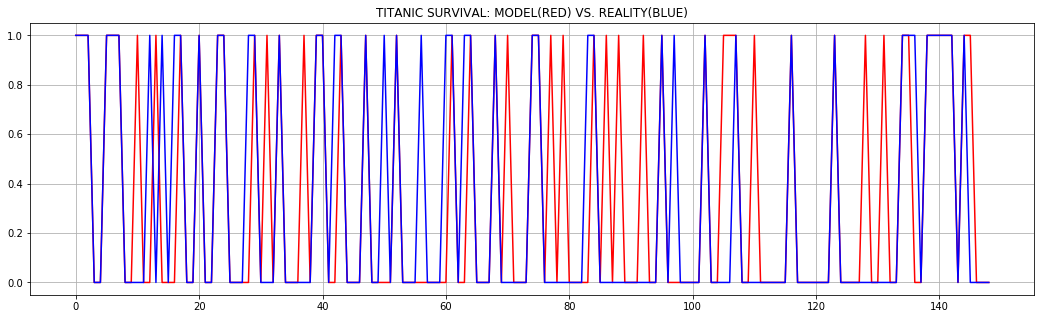

In [12]:
plt.figure(figsize=(18,5))
plt.plot(a[1:150], color='red')
plt.plot(b[1:150], color='blue')
plt.grid()
plt.title('TITANIC SURVIVAL: MODEL(RED) VS. REALITY(BLUE)')
plt.show()

In [15]:
loss, acc = clf.evaluate(x='eval.csv', y='survived', verbose=0)

In [16]:
acc

0.7462121

### 5. TEXT CLASSIFIER: THE IMDB DATASET

**IMDB Movie reviews sentiment classification**

Dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative). Reviews have been preprocessed, and each review is encoded as a sequence of word indexes (integers). For convenience, words are indexed by overall frequency in the dataset, so that for instance the integer "3" encodes the 3rd most frequent word in the data. This allows for quick filtering operations such as: "only consider the top 20,000 most common words, but eliminate the top 20 most common words".

As a convention, "0" does not stand for a specific word, but instead is used to encode any unknown word.

**Returns:**

> - 2 tuples: x_train, x_test: list of sequences, which are lists of indexes (integers). If the num_words argument was specific, the maximum possible index value is num_words-1. If the maxlen argument was specified, the largest possible sequence length is maxlen.
> - y_train, y_test: list of integer labels (1 or 0).


**Arguments:**

> - path: if you do not have the data locally (at '~/.keras/datasets/' + path), it will be downloaded to this location.
> - num_words: integer or None. Top most frequent words to consider. Any less frequent word will appear as oov_char value in the sequence data.
> - skip_top: integer. Top most frequent words to ignore (they will appear as oov_char value in the sequence data).
> - maxlen: int. Maximum sequence length. Any longer sequence will be truncated.
> - seed: int. Seed for reproducible data shuffling.
> - start_char: int. The start of a sequence will be marked with this character. Set to 1 because 0 is usually the padding character.
> - oov_char: int. words that were cut out because of the num_words or skip_top limit will be replaced with this character.
> - index_from: int. Index actual words with this index and higher.

In [2]:
import numpy as np
import tensorflow as tf

import autokeras as ak


def imdb_raw():
    max_features = 20000
    index_offset = 3  # word index offset

    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(
        num_words=max_features,
        index_from=index_offset)
    x_train = x_train
    y_train = y_train.reshape(-1, 1)
    x_test = x_test
    y_test = y_test.reshape(-1, 1)

    word_to_id = tf.keras.datasets.imdb.get_word_index()
    word_to_id = {k: (v + index_offset) for k, v in word_to_id.items()}
    word_to_id["<PAD>"] = 0
    word_to_id["<START>"] = 1
    word_to_id["<UNK>"] = 2

    id_to_word = {value: key for key, value in word_to_id.items()}
    x_train = list(map(lambda sentence: ' '.join(
        id_to_word[i] for i in sentence), x_train))
    x_test = list(map(lambda sentence: ' '.join(
        id_to_word[i] for i in sentence), x_test))
    x_train = np.array(x_train, dtype=np.str)
    x_test = np.array(x_test, dtype=np.str)
    return (x_train, y_train), (x_test, y_test)


# Prepare the data.
(x_train, y_train), (x_test, y_test) = imdb_raw()
print(x_train.shape)  # (25000,)
print(y_train.shape)  # (25000, 1)
print(x_train[0][:50])  # <START> this film was just brilliant casting <UNK>

# Initialize the TextClassifier
clf = ak.TextClassifier(max_trials=3)
# Search for the best model.
clf.fit(x_train, y_train, epochs=2)
# Evaluate on the testing data.
print('Accuracy: {accuracy}'.format(accuracy=clf.evaluate(x_test, y_test)))

D:\Program Files\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(25000,)
(25000, 1)
<START> this film was just brilliant casting locat
Train for 625 steps, validate for 157 steps
Epoch 1/2


186/625 [=======>......................] - ETA: 10:37 - loss: 0.6820 - accuracy: 0.593 - ETA: 5:52 - loss: 0.6800 - accuracy: 0.609 - ETA: 4:17 - loss: 0.6820 - accuracy: 0.58 - ETA: 3:32 - loss: 0.6836 - accuracy: 0.57 - ETA: 3:03 - loss: 0.6833 - accuracy: 0.58 - ETA: 2:44 - loss: 0.6835 - accuracy: 0.57 - ETA: 2:31 - loss: 0.6865 - accuracy: 0.56 - ETA: 2:20 - loss: 0.6973 - accuracy: 0.54 - ETA: 2:12 - loss: 0.7043 - accuracy: 0.52 - ETA: 2:06 - loss: 0.7027 - accuracy: 0.52 - ETA: 2:01 - loss: 0.7036 - accuracy: 0.50 - ETA: 1:57 - loss: 0.7027 - accuracy: 0.51 - ETA: 1:53 - loss: 0.7013 - accuracy: 0.53 - ETA: 1:49 - loss: 0.6998 - accuracy: 0.53 - ETA: 1:46 - loss: 0.6982 - accuracy: 0.54 - ETA: 1:44 - loss: 0.6988 - accuracy: 0.54 - ETA: 1:42 - loss: 0.6995 - accuracy: 0.53 - ETA: 1:40 - loss: 0.6995 - accuracy: 0.53 - ETA: 1:38 - loss: 0.6979 - accuracy: 0.54 - ETA: 1:37 - loss: 0.6987 - accuracy: 0.53 - ETA: 1:36 - loss: 0.6985 - accuracy: 0.53 - ETA: 1:34 - loss: 0.6988 - acc

372/625 [================>.............] - ETA: 51s - loss: 0.6732 - accuracy: 0.559 - ETA: 51s - loss: 0.6725 - accuracy: 0.560 - ETA: 51s - loss: 0.6719 - accuracy: 0.560 - ETA: 51s - loss: 0.6719 - accuracy: 0.561 - ETA: 51s - loss: 0.6720 - accuracy: 0.561 - ETA: 50s - loss: 0.6719 - accuracy: 0.562 - ETA: 50s - loss: 0.6713 - accuracy: 0.563 - ETA: 50s - loss: 0.6709 - accuracy: 0.563 - ETA: 50s - loss: 0.6711 - accuracy: 0.563 - ETA: 50s - loss: 0.6704 - accuracy: 0.564 - ETA: 50s - loss: 0.6693 - accuracy: 0.566 - ETA: 50s - loss: 0.6687 - accuracy: 0.567 - ETA: 50s - loss: 0.6679 - accuracy: 0.568 - ETA: 49s - loss: 0.6673 - accuracy: 0.568 - ETA: 49s - loss: 0.6672 - accuracy: 0.569 - ETA: 49s - loss: 0.6662 - accuracy: 0.570 - ETA: 49s - loss: 0.6650 - accuracy: 0.572 - ETA: 49s - loss: 0.6639 - accuracy: 0.573 - ETA: 49s - loss: 0.6635 - accuracy: 0.574 - ETA: 49s - loss: 0.6626 - accuracy: 0.575 - ETA: 49s - loss: 0.6616 - accuracy: 0.576 - ETA: 48s - loss: 0.6605 - accurac

559/625 [=========================>....] - ETA: 29s - loss: 0.5548 - accuracy: 0.680 - ETA: 29s - loss: 0.5542 - accuracy: 0.680 - ETA: 28s - loss: 0.5541 - accuracy: 0.680 - ETA: 28s - loss: 0.5537 - accuracy: 0.680 - ETA: 28s - loss: 0.5532 - accuracy: 0.681 - ETA: 28s - loss: 0.5526 - accuracy: 0.681 - ETA: 28s - loss: 0.5520 - accuracy: 0.682 - ETA: 28s - loss: 0.5513 - accuracy: 0.683 - ETA: 28s - loss: 0.5515 - accuracy: 0.683 - ETA: 28s - loss: 0.5514 - accuracy: 0.683 - ETA: 28s - loss: 0.5507 - accuracy: 0.684 - ETA: 27s - loss: 0.5505 - accuracy: 0.684 - ETA: 27s - loss: 0.5499 - accuracy: 0.684 - ETA: 27s - loss: 0.5499 - accuracy: 0.684 - ETA: 27s - loss: 0.5500 - accuracy: 0.684 - ETA: 27s - loss: 0.5496 - accuracy: 0.685 - ETA: 27s - loss: 0.5491 - accuracy: 0.685 - ETA: 27s - loss: 0.5489 - accuracy: 0.685 - ETA: 27s - loss: 0.5487 - accuracy: 0.686 - ETA: 26s - loss: 0.5486 - accuracy: 0.686 - ETA: 26s - loss: 0.5482 - accuracy: 0.686 - ETA: 26s - loss: 0.5479 - accurac

625/625 [==============================] - ETA: 7s - loss: 0.4862 - accuracy: 0.73 - ETA: 7s - loss: 0.4861 - accuracy: 0.73 - ETA: 7s - loss: 0.4858 - accuracy: 0.73 - ETA: 7s - loss: 0.4854 - accuracy: 0.73 - ETA: 7s - loss: 0.4851 - accuracy: 0.73 - ETA: 6s - loss: 0.4845 - accuracy: 0.73 - ETA: 6s - loss: 0.4841 - accuracy: 0.73 - ETA: 6s - loss: 0.4836 - accuracy: 0.73 - ETA: 6s - loss: 0.4832 - accuracy: 0.73 - ETA: 6s - loss: 0.4829 - accuracy: 0.73 - ETA: 6s - loss: 0.4825 - accuracy: 0.74 - ETA: 6s - loss: 0.4822 - accuracy: 0.74 - ETA: 6s - loss: 0.4819 - accuracy: 0.74 - ETA: 5s - loss: 0.4817 - accuracy: 0.74 - ETA: 5s - loss: 0.4814 - accuracy: 0.74 - ETA: 5s - loss: 0.4811 - accuracy: 0.74 - ETA: 5s - loss: 0.4807 - accuracy: 0.74 - ETA: 5s - loss: 0.4805 - accuracy: 0.74 - ETA: 5s - loss: 0.4799 - accuracy: 0.74 - ETA: 5s - loss: 0.4796 - accuracy: 0.74 - ETA: 5s - loss: 0.4792 - accuracy: 0.74 - ETA: 5s - loss: 0.4788 - accuracy: 0.74 - ETA: 4s - loss: 0.4786 - accuracy

186/625 [=======>......................] - ETA: 1:08 - loss: 0.1616 - accuracy: 0.93 - ETA: 1:05 - loss: 0.2095 - accuracy: 0.90 - ETA: 1:03 - loss: 0.2348 - accuracy: 0.88 - ETA: 1:03 - loss: 0.2563 - accuracy: 0.89 - ETA: 1:04 - loss: 0.2331 - accuracy: 0.91 - ETA: 1:05 - loss: 0.2256 - accuracy: 0.91 - ETA: 1:05 - loss: 0.2287 - accuracy: 0.91 - ETA: 1:06 - loss: 0.2376 - accuracy: 0.90 - ETA: 1:06 - loss: 0.2296 - accuracy: 0.90 - ETA: 1:06 - loss: 0.2430 - accuracy: 0.90 - ETA: 1:06 - loss: 0.2624 - accuracy: 0.89 - ETA: 1:05 - loss: 0.2810 - accuracy: 0.89 - ETA: 1:05 - loss: 0.2657 - accuracy: 0.90 - ETA: 1:05 - loss: 0.2682 - accuracy: 0.90 - ETA: 1:05 - loss: 0.2630 - accuracy: 0.90 - ETA: 1:05 - loss: 0.2609 - accuracy: 0.90 - ETA: 1:05 - loss: 0.2699 - accuracy: 0.89 - ETA: 1:05 - loss: 0.2663 - accuracy: 0.89 - ETA: 1:05 - loss: 0.2730 - accuracy: 0.89 - ETA: 1:05 - loss: 0.2806 - accuracy: 0.88 - ETA: 1:05 - loss: 0.2770 - accuracy: 0.89 - ETA: 1:05 - loss: 0.2787 - accura

372/625 [================>.............] - ETA: 49s - loss: 0.2848 - accuracy: 0.884 - ETA: 49s - loss: 0.2856 - accuracy: 0.883 - ETA: 48s - loss: 0.2849 - accuracy: 0.884 - ETA: 48s - loss: 0.2850 - accuracy: 0.884 - ETA: 48s - loss: 0.2848 - accuracy: 0.884 - ETA: 48s - loss: 0.2841 - accuracy: 0.884 - ETA: 48s - loss: 0.2840 - accuracy: 0.884 - ETA: 48s - loss: 0.2836 - accuracy: 0.884 - ETA: 48s - loss: 0.2832 - accuracy: 0.884 - ETA: 48s - loss: 0.2834 - accuracy: 0.884 - ETA: 48s - loss: 0.2829 - accuracy: 0.884 - ETA: 47s - loss: 0.2834 - accuracy: 0.884 - ETA: 47s - loss: 0.2825 - accuracy: 0.885 - ETA: 47s - loss: 0.2827 - accuracy: 0.885 - ETA: 47s - loss: 0.2824 - accuracy: 0.885 - ETA: 47s - loss: 0.2817 - accuracy: 0.885 - ETA: 47s - loss: 0.2816 - accuracy: 0.885 - ETA: 47s - loss: 0.2813 - accuracy: 0.885 - ETA: 47s - loss: 0.2806 - accuracy: 0.886 - ETA: 47s - loss: 0.2804 - accuracy: 0.886 - ETA: 46s - loss: 0.2794 - accuracy: 0.887 - ETA: 46s - loss: 0.2787 - accurac

559/625 [=========================>....] - ETA: 28s - loss: 0.2511 - accuracy: 0.899 - ETA: 28s - loss: 0.2507 - accuracy: 0.899 - ETA: 28s - loss: 0.2508 - accuracy: 0.899 - ETA: 28s - loss: 0.2510 - accuracy: 0.899 - ETA: 27s - loss: 0.2507 - accuracy: 0.899 - ETA: 27s - loss: 0.2502 - accuracy: 0.899 - ETA: 27s - loss: 0.2498 - accuracy: 0.899 - ETA: 27s - loss: 0.2499 - accuracy: 0.899 - ETA: 27s - loss: 0.2508 - accuracy: 0.899 - ETA: 27s - loss: 0.2509 - accuracy: 0.899 - ETA: 27s - loss: 0.2504 - accuracy: 0.899 - ETA: 27s - loss: 0.2505 - accuracy: 0.899 - ETA: 26s - loss: 0.2501 - accuracy: 0.900 - ETA: 26s - loss: 0.2498 - accuracy: 0.900 - ETA: 26s - loss: 0.2499 - accuracy: 0.900 - ETA: 26s - loss: 0.2496 - accuracy: 0.900 - ETA: 26s - loss: 0.2497 - accuracy: 0.900 - ETA: 26s - loss: 0.2497 - accuracy: 0.900 - ETA: 26s - loss: 0.2498 - accuracy: 0.900 - ETA: 26s - loss: 0.2497 - accuracy: 0.900 - ETA: 26s - loss: 0.2495 - accuracy: 0.900 - ETA: 25s - loss: 0.2495 - accurac

625/625 [==============================] - ETA: 7s - loss: 0.2290 - accuracy: 0.90 - ETA: 7s - loss: 0.2288 - accuracy: 0.90 - ETA: 7s - loss: 0.2287 - accuracy: 0.90 - ETA: 7s - loss: 0.2286 - accuracy: 0.90 - ETA: 6s - loss: 0.2286 - accuracy: 0.90 - ETA: 6s - loss: 0.2287 - accuracy: 0.90 - ETA: 6s - loss: 0.2284 - accuracy: 0.90 - ETA: 6s - loss: 0.2285 - accuracy: 0.90 - ETA: 6s - loss: 0.2282 - accuracy: 0.90 - ETA: 6s - loss: 0.2280 - accuracy: 0.90 - ETA: 6s - loss: 0.2278 - accuracy: 0.90 - ETA: 6s - loss: 0.2280 - accuracy: 0.90 - ETA: 6s - loss: 0.2280 - accuracy: 0.90 - ETA: 5s - loss: 0.2279 - accuracy: 0.90 - ETA: 5s - loss: 0.2276 - accuracy: 0.91 - ETA: 5s - loss: 0.2274 - accuracy: 0.91 - ETA: 5s - loss: 0.2271 - accuracy: 0.91 - ETA: 5s - loss: 0.2269 - accuracy: 0.91 - ETA: 5s - loss: 0.2266 - accuracy: 0.91 - ETA: 5s - loss: 0.2265 - accuracy: 0.91 - ETA: 5s - loss: 0.2266 - accuracy: 0.91 - ETA: 5s - loss: 0.2264 - accuracy: 0.91 - ETA: 4s - loss: 0.2263 - accuracy

Train for 625 steps, validate for 157 steps
Epoch 1/2


185/625 [=======>......................] - ETA: 6:28 - loss: 0.6827 - accuracy: 0.62 - ETA: 3:46 - loss: 0.6774 - accuracy: 0.62 - ETA: 2:52 - loss: 0.6857 - accuracy: 0.59 - ETA: 2:25 - loss: 0.6833 - accuracy: 0.58 - ETA: 2:10 - loss: 0.6831 - accuracy: 0.58 - ETA: 2:00 - loss: 0.6874 - accuracy: 0.57 - ETA: 1:52 - loss: 0.6872 - accuracy: 0.57 - ETA: 1:47 - loss: 0.6968 - accuracy: 0.54 - ETA: 1:44 - loss: 0.7035 - accuracy: 0.52 - ETA: 1:41 - loss: 0.7011 - accuracy: 0.52 - ETA: 1:38 - loss: 0.7025 - accuracy: 0.51 - ETA: 1:36 - loss: 0.7013 - accuracy: 0.52 - ETA: 1:34 - loss: 0.7013 - accuracy: 0.50 - ETA: 1:32 - loss: 0.7006 - accuracy: 0.50 - ETA: 1:31 - loss: 0.6983 - accuracy: 0.51 - ETA: 1:29 - loss: 0.6985 - accuracy: 0.51 - ETA: 1:28 - loss: 0.6983 - accuracy: 0.51 - ETA: 1:27 - loss: 0.6987 - accuracy: 0.51 - ETA: 1:26 - loss: 0.6968 - accuracy: 0.52 - ETA: 1:25 - loss: 0.6979 - accuracy: 0.51 - ETA: 1:24 - loss: 0.6976 - accuracy: 0.51 - ETA: 1:23 - loss: 0.6983 - accura

371/625 [================>.............] - ETA: 51s - loss: 0.6766 - accuracy: 0.545 - ETA: 51s - loss: 0.6767 - accuracy: 0.546 - ETA: 51s - loss: 0.6763 - accuracy: 0.547 - ETA: 50s - loss: 0.6757 - accuracy: 0.547 - ETA: 50s - loss: 0.6758 - accuracy: 0.548 - ETA: 50s - loss: 0.6760 - accuracy: 0.548 - ETA: 50s - loss: 0.6765 - accuracy: 0.547 - ETA: 50s - loss: 0.6759 - accuracy: 0.548 - ETA: 50s - loss: 0.6760 - accuracy: 0.548 - ETA: 50s - loss: 0.6761 - accuracy: 0.548 - ETA: 50s - loss: 0.6755 - accuracy: 0.548 - ETA: 49s - loss: 0.6746 - accuracy: 0.549 - ETA: 49s - loss: 0.6742 - accuracy: 0.550 - ETA: 49s - loss: 0.6736 - accuracy: 0.551 - ETA: 49s - loss: 0.6732 - accuracy: 0.552 - ETA: 49s - loss: 0.6730 - accuracy: 0.552 - ETA: 49s - loss: 0.6721 - accuracy: 0.553 - ETA: 49s - loss: 0.6717 - accuracy: 0.554 - ETA: 49s - loss: 0.6713 - accuracy: 0.554 - ETA: 48s - loss: 0.6710 - accuracy: 0.555 - ETA: 48s - loss: 0.6702 - accuracy: 0.556 - ETA: 48s - loss: 0.6693 - accurac

558/625 [=========================>....] - ETA: 29s - loss: 0.5666 - accuracy: 0.664 - ETA: 29s - loss: 0.5661 - accuracy: 0.665 - ETA: 29s - loss: 0.5654 - accuracy: 0.665 - ETA: 28s - loss: 0.5651 - accuracy: 0.666 - ETA: 28s - loss: 0.5647 - accuracy: 0.666 - ETA: 28s - loss: 0.5643 - accuracy: 0.666 - ETA: 28s - loss: 0.5634 - accuracy: 0.667 - ETA: 28s - loss: 0.5630 - accuracy: 0.668 - ETA: 28s - loss: 0.5622 - accuracy: 0.668 - ETA: 28s - loss: 0.5620 - accuracy: 0.669 - ETA: 28s - loss: 0.5620 - accuracy: 0.669 - ETA: 28s - loss: 0.5611 - accuracy: 0.670 - ETA: 27s - loss: 0.5610 - accuracy: 0.670 - ETA: 27s - loss: 0.5606 - accuracy: 0.670 - ETA: 27s - loss: 0.5602 - accuracy: 0.670 - ETA: 27s - loss: 0.5600 - accuracy: 0.671 - ETA: 27s - loss: 0.5596 - accuracy: 0.671 - ETA: 27s - loss: 0.5593 - accuracy: 0.671 - ETA: 27s - loss: 0.5593 - accuracy: 0.671 - ETA: 27s - loss: 0.5589 - accuracy: 0.672 - ETA: 27s - loss: 0.5583 - accuracy: 0.672 - ETA: 26s - loss: 0.5578 - accurac

625/625 [==============================] - ETA: 7s - loss: 0.4955 - accuracy: 0.72 - ETA: 7s - loss: 0.4949 - accuracy: 0.72 - ETA: 7s - loss: 0.4946 - accuracy: 0.72 - ETA: 7s - loss: 0.4943 - accuracy: 0.72 - ETA: 7s - loss: 0.4942 - accuracy: 0.72 - ETA: 7s - loss: 0.4938 - accuracy: 0.72 - ETA: 6s - loss: 0.4932 - accuracy: 0.72 - ETA: 6s - loss: 0.4926 - accuracy: 0.72 - ETA: 6s - loss: 0.4922 - accuracy: 0.72 - ETA: 6s - loss: 0.4917 - accuracy: 0.72 - ETA: 6s - loss: 0.4914 - accuracy: 0.72 - ETA: 6s - loss: 0.4909 - accuracy: 0.72 - ETA: 6s - loss: 0.4904 - accuracy: 0.72 - ETA: 6s - loss: 0.4902 - accuracy: 0.72 - ETA: 6s - loss: 0.4900 - accuracy: 0.72 - ETA: 5s - loss: 0.4896 - accuracy: 0.72 - ETA: 5s - loss: 0.4892 - accuracy: 0.72 - ETA: 5s - loss: 0.4887 - accuracy: 0.73 - ETA: 5s - loss: 0.4887 - accuracy: 0.73 - ETA: 5s - loss: 0.4884 - accuracy: 0.73 - ETA: 5s - loss: 0.4880 - accuracy: 0.73 - ETA: 5s - loss: 0.4876 - accuracy: 0.73 - ETA: 5s - loss: 0.4871 - accuracy

186/625 [=======>......................] - ETA: 1:26 - loss: 0.2098 - accuracy: 0.90 - ETA: 1:22 - loss: 0.2257 - accuracy: 0.89 - ETA: 1:19 - loss: 0.2323 - accuracy: 0.89 - ETA: 1:18 - loss: 0.2606 - accuracy: 0.88 - ETA: 1:16 - loss: 0.2550 - accuracy: 0.87 - ETA: 1:17 - loss: 0.2534 - accuracy: 0.88 - ETA: 1:16 - loss: 0.2512 - accuracy: 0.88 - ETA: 1:17 - loss: 0.2493 - accuracy: 0.89 - ETA: 1:17 - loss: 0.2466 - accuracy: 0.89 - ETA: 1:20 - loss: 0.2620 - accuracy: 0.88 - ETA: 1:22 - loss: 0.2740 - accuracy: 0.87 - ETA: 1:24 - loss: 0.2854 - accuracy: 0.86 - ETA: 1:25 - loss: 0.2716 - accuracy: 0.87 - ETA: 1:26 - loss: 0.2717 - accuracy: 0.87 - ETA: 1:26 - loss: 0.2705 - accuracy: 0.88 - ETA: 1:26 - loss: 0.2719 - accuracy: 0.88 - ETA: 1:26 - loss: 0.2783 - accuracy: 0.87 - ETA: 1:25 - loss: 0.2756 - accuracy: 0.88 - ETA: 1:25 - loss: 0.2798 - accuracy: 0.87 - ETA: 1:25 - loss: 0.2863 - accuracy: 0.87 - ETA: 1:25 - loss: 0.2824 - accuracy: 0.87 - ETA: 1:25 - loss: 0.2854 - accura

372/625 [================>.............] - ETA: 54s - loss: 0.2898 - accuracy: 0.879 - ETA: 54s - loss: 0.2902 - accuracy: 0.879 - ETA: 54s - loss: 0.2897 - accuracy: 0.879 - ETA: 53s - loss: 0.2894 - accuracy: 0.879 - ETA: 53s - loss: 0.2893 - accuracy: 0.879 - ETA: 53s - loss: 0.2885 - accuracy: 0.880 - ETA: 53s - loss: 0.2888 - accuracy: 0.879 - ETA: 53s - loss: 0.2884 - accuracy: 0.880 - ETA: 53s - loss: 0.2879 - accuracy: 0.880 - ETA: 52s - loss: 0.2886 - accuracy: 0.879 - ETA: 52s - loss: 0.2880 - accuracy: 0.880 - ETA: 52s - loss: 0.2883 - accuracy: 0.880 - ETA: 52s - loss: 0.2874 - accuracy: 0.880 - ETA: 52s - loss: 0.2875 - accuracy: 0.880 - ETA: 52s - loss: 0.2870 - accuracy: 0.881 - ETA: 52s - loss: 0.2866 - accuracy: 0.881 - ETA: 51s - loss: 0.2863 - accuracy: 0.881 - ETA: 51s - loss: 0.2861 - accuracy: 0.881 - ETA: 51s - loss: 0.2853 - accuracy: 0.881 - ETA: 51s - loss: 0.2846 - accuracy: 0.882 - ETA: 51s - loss: 0.2841 - accuracy: 0.882 - ETA: 51s - loss: 0.2840 - accurac

558/625 [=========================>....] - ETA: 30s - loss: 0.2566 - accuracy: 0.896 - ETA: 30s - loss: 0.2563 - accuracy: 0.896 - ETA: 30s - loss: 0.2562 - accuracy: 0.896 - ETA: 29s - loss: 0.2560 - accuracy: 0.896 - ETA: 29s - loss: 0.2556 - accuracy: 0.896 - ETA: 29s - loss: 0.2551 - accuracy: 0.896 - ETA: 29s - loss: 0.2548 - accuracy: 0.896 - ETA: 29s - loss: 0.2548 - accuracy: 0.896 - ETA: 29s - loss: 0.2553 - accuracy: 0.896 - ETA: 29s - loss: 0.2553 - accuracy: 0.896 - ETA: 29s - loss: 0.2551 - accuracy: 0.896 - ETA: 29s - loss: 0.2549 - accuracy: 0.896 - ETA: 28s - loss: 0.2547 - accuracy: 0.896 - ETA: 28s - loss: 0.2546 - accuracy: 0.896 - ETA: 28s - loss: 0.2547 - accuracy: 0.896 - ETA: 28s - loss: 0.2544 - accuracy: 0.897 - ETA: 28s - loss: 0.2545 - accuracy: 0.897 - ETA: 28s - loss: 0.2545 - accuracy: 0.896 - ETA: 28s - loss: 0.2547 - accuracy: 0.896 - ETA: 28s - loss: 0.2543 - accuracy: 0.896 - ETA: 27s - loss: 0.2540 - accuracy: 0.896 - ETA: 27s - loss: 0.2541 - accurac

625/625 [==============================] - ETA: 8s - loss: 0.2346 - accuracy: 0.90 - ETA: 7s - loss: 0.2343 - accuracy: 0.90 - ETA: 7s - loss: 0.2341 - accuracy: 0.90 - ETA: 7s - loss: 0.2340 - accuracy: 0.90 - ETA: 7s - loss: 0.2339 - accuracy: 0.90 - ETA: 7s - loss: 0.2339 - accuracy: 0.90 - ETA: 7s - loss: 0.2337 - accuracy: 0.90 - ETA: 7s - loss: 0.2334 - accuracy: 0.90 - ETA: 7s - loss: 0.2333 - accuracy: 0.90 - ETA: 6s - loss: 0.2330 - accuracy: 0.90 - ETA: 6s - loss: 0.2330 - accuracy: 0.90 - ETA: 6s - loss: 0.2327 - accuracy: 0.90 - ETA: 6s - loss: 0.2326 - accuracy: 0.90 - ETA: 6s - loss: 0.2326 - accuracy: 0.90 - ETA: 6s - loss: 0.2325 - accuracy: 0.90 - ETA: 6s - loss: 0.2322 - accuracy: 0.90 - ETA: 6s - loss: 0.2320 - accuracy: 0.90 - ETA: 5s - loss: 0.2318 - accuracy: 0.90 - ETA: 5s - loss: 0.2317 - accuracy: 0.90 - ETA: 5s - loss: 0.2316 - accuracy: 0.90 - ETA: 5s - loss: 0.2314 - accuracy: 0.90 - ETA: 5s - loss: 0.2311 - accuracy: 0.90 - ETA: 5s - loss: 0.2310 - accuracy

INFO:tensorflow:Oracle triggered exit
Train for 782 steps, validate for 157 steps
Epoch 1/2


184/782 [======>.......................] - ETA: 7:20 - loss: 0.7044 - accuracy: 0.50 - ETA: 4:26 - loss: 0.7005 - accuracy: 0.48 - ETA: 3:29 - loss: 0.6965 - accuracy: 0.50 - ETA: 3:00 - loss: 0.6934 - accuracy: 0.51 - ETA: 2:43 - loss: 0.6880 - accuracy: 0.53 - ETA: 2:31 - loss: 0.6883 - accuracy: 0.53 - ETA: 2:24 - loss: 0.6915 - accuracy: 0.53 - ETA: 2:18 - loss: 0.7011 - accuracy: 0.51 - ETA: 2:13 - loss: 0.7060 - accuracy: 0.49 - ETA: 2:09 - loss: 0.7037 - accuracy: 0.50 - ETA: 2:06 - loss: 0.7077 - accuracy: 0.48 - ETA: 2:03 - loss: 0.7055 - accuracy: 0.49 - ETA: 2:01 - loss: 0.7043 - accuracy: 0.49 - ETA: 1:59 - loss: 0.7038 - accuracy: 0.49 - ETA: 1:57 - loss: 0.7035 - accuracy: 0.49 - ETA: 1:55 - loss: 0.7028 - accuracy: 0.49 - ETA: 1:53 - loss: 0.7024 - accuracy: 0.49 - ETA: 1:52 - loss: 0.7017 - accuracy: 0.50 - ETA: 1:51 - loss: 0.7007 - accuracy: 0.50 - ETA: 1:50 - loss: 0.7003 - accuracy: 0.50 - ETA: 1:49 - loss: 0.6997 - accuracy: 0.50 - ETA: 1:48 - loss: 0.6992 - accura

370/782 [=============>................] - ETA: 1:15 - loss: 0.6784 - accuracy: 0.55 - ETA: 1:15 - loss: 0.6775 - accuracy: 0.55 - ETA: 1:15 - loss: 0.6771 - accuracy: 0.55 - ETA: 1:14 - loss: 0.6771 - accuracy: 0.55 - ETA: 1:14 - loss: 0.6764 - accuracy: 0.56 - ETA: 1:14 - loss: 0.6765 - accuracy: 0.56 - ETA: 1:14 - loss: 0.6763 - accuracy: 0.56 - ETA: 1:14 - loss: 0.6768 - accuracy: 0.56 - ETA: 1:14 - loss: 0.6761 - accuracy: 0.56 - ETA: 1:14 - loss: 0.6758 - accuracy: 0.56 - ETA: 1:14 - loss: 0.6757 - accuracy: 0.56 - ETA: 1:13 - loss: 0.6751 - accuracy: 0.56 - ETA: 1:13 - loss: 0.6741 - accuracy: 0.56 - ETA: 1:13 - loss: 0.6735 - accuracy: 0.56 - ETA: 1:13 - loss: 0.6728 - accuracy: 0.56 - ETA: 1:13 - loss: 0.6722 - accuracy: 0.56 - ETA: 1:13 - loss: 0.6715 - accuracy: 0.56 - ETA: 1:13 - loss: 0.6703 - accuracy: 0.56 - ETA: 1:12 - loss: 0.6696 - accuracy: 0.56 - ETA: 1:12 - loss: 0.6686 - accuracy: 0.57 - ETA: 1:12 - loss: 0.6682 - accuracy: 0.57 - ETA: 1:12 - loss: 0.6676 - accura

556/782 [====================>.........] - ETA: 51s - loss: 0.5590 - accuracy: 0.677 - ETA: 51s - loss: 0.5584 - accuracy: 0.678 - ETA: 51s - loss: 0.5578 - accuracy: 0.678 - ETA: 51s - loss: 0.5571 - accuracy: 0.678 - ETA: 50s - loss: 0.5569 - accuracy: 0.679 - ETA: 50s - loss: 0.5567 - accuracy: 0.679 - ETA: 50s - loss: 0.5562 - accuracy: 0.680 - ETA: 50s - loss: 0.5554 - accuracy: 0.680 - ETA: 50s - loss: 0.5547 - accuracy: 0.681 - ETA: 50s - loss: 0.5540 - accuracy: 0.682 - ETA: 50s - loss: 0.5541 - accuracy: 0.682 - ETA: 49s - loss: 0.5542 - accuracy: 0.682 - ETA: 49s - loss: 0.5534 - accuracy: 0.682 - ETA: 49s - loss: 0.5534 - accuracy: 0.683 - ETA: 49s - loss: 0.5530 - accuracy: 0.683 - ETA: 49s - loss: 0.5528 - accuracy: 0.683 - ETA: 49s - loss: 0.5528 - accuracy: 0.684 - ETA: 49s - loss: 0.5524 - accuracy: 0.684 - ETA: 49s - loss: 0.5519 - accuracy: 0.684 - ETA: 48s - loss: 0.5516 - accuracy: 0.684 - ETA: 48s - loss: 0.5515 - accuracy: 0.685 - ETA: 48s - loss: 0.5510 - accurac

743/782 [===========================>..] - ETA: 29s - loss: 0.4855 - accuracy: 0.737 - ETA: 29s - loss: 0.4850 - accuracy: 0.738 - ETA: 29s - loss: 0.4846 - accuracy: 0.738 - ETA: 29s - loss: 0.4842 - accuracy: 0.738 - ETA: 29s - loss: 0.4840 - accuracy: 0.738 - ETA: 29s - loss: 0.4839 - accuracy: 0.738 - ETA: 29s - loss: 0.4836 - accuracy: 0.739 - ETA: 28s - loss: 0.4832 - accuracy: 0.739 - ETA: 28s - loss: 0.4827 - accuracy: 0.739 - ETA: 28s - loss: 0.4821 - accuracy: 0.740 - ETA: 28s - loss: 0.4818 - accuracy: 0.740 - ETA: 28s - loss: 0.4813 - accuracy: 0.741 - ETA: 28s - loss: 0.4811 - accuracy: 0.741 - ETA: 28s - loss: 0.4807 - accuracy: 0.741 - ETA: 28s - loss: 0.4804 - accuracy: 0.741 - ETA: 27s - loss: 0.4800 - accuracy: 0.741 - ETA: 27s - loss: 0.4798 - accuracy: 0.742 - ETA: 27s - loss: 0.4795 - accuracy: 0.742 - ETA: 27s - loss: 0.4792 - accuracy: 0.742 - ETA: 27s - loss: 0.4789 - accuracy: 0.742 - ETA: 27s - loss: 0.4786 - accuracy: 0.743 - ETA: 27s - loss: 0.4782 - accurac

782/782 [==============================] - ETA: 5s - loss: 0.4367 - accuracy: 0.77 - ETA: 5s - loss: 0.4364 - accuracy: 0.77 - ETA: 4s - loss: 0.4366 - accuracy: 0.77 - ETA: 4s - loss: 0.4364 - accuracy: 0.77 - ETA: 4s - loss: 0.4363 - accuracy: 0.77 - ETA: 4s - loss: 0.4360 - accuracy: 0.77 - ETA: 4s - loss: 0.4357 - accuracy: 0.77 - ETA: 4s - loss: 0.4354 - accuracy: 0.77 - ETA: 4s - loss: 0.4351 - accuracy: 0.77 - ETA: 3s - loss: 0.4349 - accuracy: 0.77 - ETA: 3s - loss: 0.4347 - accuracy: 0.77 - ETA: 3s - loss: 0.4345 - accuracy: 0.77 - ETA: 3s - loss: 0.4343 - accuracy: 0.77 - ETA: 3s - loss: 0.4341 - accuracy: 0.77 - ETA: 3s - loss: 0.4340 - accuracy: 0.77 - ETA: 3s - loss: 0.4338 - accuracy: 0.77 - ETA: 2s - loss: 0.4336 - accuracy: 0.77 - ETA: 2s - loss: 0.4334 - accuracy: 0.77 - ETA: 2s - loss: 0.4333 - accuracy: 0.77 - ETA: 2s - loss: 0.4335 - accuracy: 0.77 - ETA: 2s - loss: 0.4333 - accuracy: 0.77 - ETA: 2s - loss: 0.4332 - accuracy: 0.77 - ETA: 2s - loss: 0.4330 - accuracy

186/782 [======>.......................] - ETA: 1:37 - loss: 0.1485 - accuracy: 0.93 - ETA: 1:35 - loss: 0.1887 - accuracy: 0.95 - ETA: 1:34 - loss: 0.2144 - accuracy: 0.93 - ETA: 1:34 - loss: 0.2548 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2725 - accuracy: 0.88 - ETA: 1:34 - loss: 0.2583 - accuracy: 0.89 - ETA: 1:33 - loss: 0.2532 - accuracy: 0.90 - ETA: 1:34 - loss: 0.2654 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2564 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2620 - accuracy: 0.89 - ETA: 1:34 - loss: 0.2825 - accuracy: 0.88 - ETA: 1:33 - loss: 0.2936 - accuracy: 0.87 - ETA: 1:33 - loss: 0.2821 - accuracy: 0.88 - ETA: 1:32 - loss: 0.2805 - accuracy: 0.88 - ETA: 1:32 - loss: 0.2890 - accuracy: 0.88 - ETA: 1:32 - loss: 0.2830 - accuracy: 0.88 - ETA: 1:32 - loss: 0.2886 - accuracy: 0.88 - ETA: 1:32 - loss: 0.2843 - accuracy: 0.88 - ETA: 1:32 - loss: 0.2869 - accuracy: 0.88 - ETA: 1:32 - loss: 0.2968 - accuracy: 0.87 - ETA: 1:32 - loss: 0.2938 - accuracy: 0.87 - ETA: 1:31 - loss: 0.2924 - accura

372/782 [=============>................] - ETA: 1:14 - loss: 0.2873 - accuracy: 0.88 - ETA: 1:14 - loss: 0.2881 - accuracy: 0.88 - ETA: 1:14 - loss: 0.2877 - accuracy: 0.88 - ETA: 1:14 - loss: 0.2877 - accuracy: 0.88 - ETA: 1:14 - loss: 0.2879 - accuracy: 0.88 - ETA: 1:14 - loss: 0.2872 - accuracy: 0.88 - ETA: 1:14 - loss: 0.2868 - accuracy: 0.88 - ETA: 1:13 - loss: 0.2861 - accuracy: 0.88 - ETA: 1:13 - loss: 0.2858 - accuracy: 0.88 - ETA: 1:13 - loss: 0.2862 - accuracy: 0.88 - ETA: 1:13 - loss: 0.2856 - accuracy: 0.88 - ETA: 1:13 - loss: 0.2856 - accuracy: 0.88 - ETA: 1:13 - loss: 0.2849 - accuracy: 0.88 - ETA: 1:13 - loss: 0.2849 - accuracy: 0.88 - ETA: 1:13 - loss: 0.2846 - accuracy: 0.88 - ETA: 1:13 - loss: 0.2840 - accuracy: 0.88 - ETA: 1:13 - loss: 0.2839 - accuracy: 0.88 - ETA: 1:12 - loss: 0.2838 - accuracy: 0.88 - ETA: 1:12 - loss: 0.2831 - accuracy: 0.88 - ETA: 1:12 - loss: 0.2824 - accuracy: 0.88 - ETA: 1:12 - loss: 0.2818 - accuracy: 0.88 - ETA: 1:12 - loss: 0.2812 - accura

558/782 [====================>.........] - ETA: 52s - loss: 0.2543 - accuracy: 0.899 - ETA: 51s - loss: 0.2540 - accuracy: 0.899 - ETA: 51s - loss: 0.2538 - accuracy: 0.899 - ETA: 51s - loss: 0.2536 - accuracy: 0.899 - ETA: 51s - loss: 0.2533 - accuracy: 0.899 - ETA: 51s - loss: 0.2528 - accuracy: 0.899 - ETA: 51s - loss: 0.2524 - accuracy: 0.899 - ETA: 51s - loss: 0.2524 - accuracy: 0.899 - ETA: 51s - loss: 0.2525 - accuracy: 0.899 - ETA: 50s - loss: 0.2523 - accuracy: 0.899 - ETA: 50s - loss: 0.2520 - accuracy: 0.900 - ETA: 50s - loss: 0.2520 - accuracy: 0.900 - ETA: 50s - loss: 0.2518 - accuracy: 0.900 - ETA: 50s - loss: 0.2516 - accuracy: 0.900 - ETA: 50s - loss: 0.2516 - accuracy: 0.900 - ETA: 50s - loss: 0.2513 - accuracy: 0.900 - ETA: 50s - loss: 0.2512 - accuracy: 0.900 - ETA: 49s - loss: 0.2513 - accuracy: 0.900 - ETA: 49s - loss: 0.2513 - accuracy: 0.900 - ETA: 49s - loss: 0.2513 - accuracy: 0.900 - ETA: 49s - loss: 0.2511 - accuracy: 0.900 - ETA: 49s - loss: 0.2514 - accurac

746/782 [===========================>..] - ETA: 27s - loss: 0.2283 - accuracy: 0.910 - ETA: 27s - loss: 0.2281 - accuracy: 0.910 - ETA: 27s - loss: 0.2279 - accuracy: 0.910 - ETA: 27s - loss: 0.2278 - accuracy: 0.910 - ETA: 27s - loss: 0.2280 - accuracy: 0.910 - ETA: 27s - loss: 0.2280 - accuracy: 0.910 - ETA: 27s - loss: 0.2277 - accuracy: 0.910 - ETA: 26s - loss: 0.2274 - accuracy: 0.910 - ETA: 26s - loss: 0.2272 - accuracy: 0.910 - ETA: 26s - loss: 0.2269 - accuracy: 0.910 - ETA: 26s - loss: 0.2270 - accuracy: 0.910 - ETA: 26s - loss: 0.2267 - accuracy: 0.910 - ETA: 26s - loss: 0.2267 - accuracy: 0.910 - ETA: 26s - loss: 0.2266 - accuracy: 0.910 - ETA: 26s - loss: 0.2266 - accuracy: 0.910 - ETA: 25s - loss: 0.2262 - accuracy: 0.910 - ETA: 25s - loss: 0.2260 - accuracy: 0.911 - ETA: 25s - loss: 0.2259 - accuracy: 0.911 - ETA: 25s - loss: 0.2258 - accuracy: 0.911 - ETA: 25s - loss: 0.2255 - accuracy: 0.911 - ETA: 25s - loss: 0.2254 - accuracy: 0.911 - ETA: 25s - loss: 0.2252 - accurac

782/782 [==============================] - ETA: 4s - loss: 0.2101 - accuracy: 0.91 - ETA: 4s - loss: 0.2102 - accuracy: 0.91 - ETA: 4s - loss: 0.2100 - accuracy: 0.91 - ETA: 3s - loss: 0.2100 - accuracy: 0.91 - ETA: 3s - loss: 0.2098 - accuracy: 0.91 - ETA: 3s - loss: 0.2098 - accuracy: 0.91 - ETA: 3s - loss: 0.2096 - accuracy: 0.91 - ETA: 3s - loss: 0.2095 - accuracy: 0.91 - ETA: 3s - loss: 0.2093 - accuracy: 0.91 - ETA: 3s - loss: 0.2092 - accuracy: 0.91 - ETA: 3s - loss: 0.2091 - accuracy: 0.91 - ETA: 2s - loss: 0.2091 - accuracy: 0.91 - ETA: 2s - loss: 0.2091 - accuracy: 0.91 - ETA: 2s - loss: 0.2089 - accuracy: 0.91 - ETA: 2s - loss: 0.2089 - accuracy: 0.91 - ETA: 2s - loss: 0.2089 - accuracy: 0.91 - ETA: 2s - loss: 0.2091 - accuracy: 0.91 - ETA: 2s - loss: 0.2089 - accuracy: 0.91 - ETA: 2s - loss: 0.2091 - accuracy: 0.91 - ETA: 1s - loss: 0.2090 - accuracy: 0.91 - ETA: 1s - loss: 0.2089 - accuracy: 0.91 - ETA: 1s - loss: 0.2092 - accuracy: 0.91 - ETA: 1s - loss: 0.2092 - accuracy

370/782 [=============>................] - ETA: 1:42 - loss: 0.4086 - accuracy: 0.84 - ETA: 47s - loss: 0.2343 - accuracy: 0.9167 - ETA: 36s - loss: 0.2883 - accuracy: 0.868 - ETA: 31s - loss: 0.2460 - accuracy: 0.888 - ETA: 27s - loss: 0.2587 - accuracy: 0.890 - ETA: 26s - loss: 0.2815 - accuracy: 0.885 - ETA: 25s - loss: 0.2775 - accuracy: 0.883 - ETA: 24s - loss: 0.2823 - accuracy: 0.886 - ETA: 24s - loss: 0.2885 - accuracy: 0.881 - ETA: 23s - loss: 0.2997 - accuracy: 0.879 - ETA: 23s - loss: 0.2889 - accuracy: 0.882 - ETA: 23s - loss: 0.3001 - accuracy: 0.877 - ETA: 23s - loss: 0.2913 - accuracy: 0.882 - ETA: 22s - loss: 0.2930 - accuracy: 0.879 - ETA: 22s - loss: 0.2911 - accuracy: 0.879 - ETA: 22s - loss: 0.3034 - accuracy: 0.876 - ETA: 22s - loss: 0.3017 - accuracy: 0.876 - ETA: 22s - loss: 0.2973 - accuracy: 0.877 - ETA: 22s - loss: 0.3072 - accuracy: 0.874 - ETA: 22s - loss: 0.3088 - accuracy: 0.873 - ETA: 22s - loss: 0.3089 - accuracy: 0.873 - ETA: 22s - loss: 0.3070 - accura

756/782 [============================>.] - ETA: 11s - loss: 0.3006 - accuracy: 0.881 - ETA: 11s - loss: 0.3008 - accuracy: 0.881 - ETA: 11s - loss: 0.3015 - accuracy: 0.881 - ETA: 11s - loss: 0.3011 - accuracy: 0.881 - ETA: 11s - loss: 0.3012 - accuracy: 0.881 - ETA: 11s - loss: 0.3009 - accuracy: 0.881 - ETA: 11s - loss: 0.3003 - accuracy: 0.881 - ETA: 11s - loss: 0.3009 - accuracy: 0.881 - ETA: 11s - loss: 0.3014 - accuracy: 0.881 - ETA: 11s - loss: 0.3016 - accuracy: 0.881 - ETA: 11s - loss: 0.3014 - accuracy: 0.881 - ETA: 11s - loss: 0.3019 - accuracy: 0.881 - ETA: 11s - loss: 0.3029 - accuracy: 0.880 - ETA: 10s - loss: 0.3028 - accuracy: 0.880 - ETA: 10s - loss: 0.3025 - accuracy: 0.880 - ETA: 10s - loss: 0.3027 - accuracy: 0.880 - ETA: 10s - loss: 0.3020 - accuracy: 0.881 - ETA: 10s - loss: 0.3014 - accuracy: 0.881 - ETA: 10s - loss: 0.3014 - accuracy: 0.881 - ETA: 10s - loss: 0.3010 - accuracy: 0.881 - ETA: 10s - loss: 0.3012 - accuracy: 0.881 - ETA: 10s - loss: 0.3007 - accurac

782/782 [==============================] - ETA: 0s - loss: 0.2924 - accuracy: 0.88 - ETA: 0s - loss: 0.2926 - accuracy: 0.88 - ETA: 0s - loss: 0.2925 - accuracy: 0.88 - ETA: 0s - loss: 0.2920 - accuracy: 0.88 - ETA: 0s - loss: 0.2918 - accuracy: 0.88 - ETA: 0s - loss: 0.2922 - accuracy: 0.88 - ETA: 0s - loss: 0.2922 - accuracy: 0.88 - ETA: 0s - loss: 0.2924 - accuracy: 0.88 - ETA: 0s - loss: 0.2922 - accuracy: 0.88 - ETA: 0s - loss: 0.2927 - accuracy: 0.88 - ETA: 0s - loss: 0.2926 - accuracy: 0.88 - ETA: 0s - loss: 0.2921 - accuracy: 0.88 - 23s 29ms/step - loss: 0.2919 - accuracy: 0.8843
Accuracy: [0.29194511187350963, 0.88432]


In [15]:
X=x_train[1:150]
a=clf.predict(X)
b=y_train[1:150]

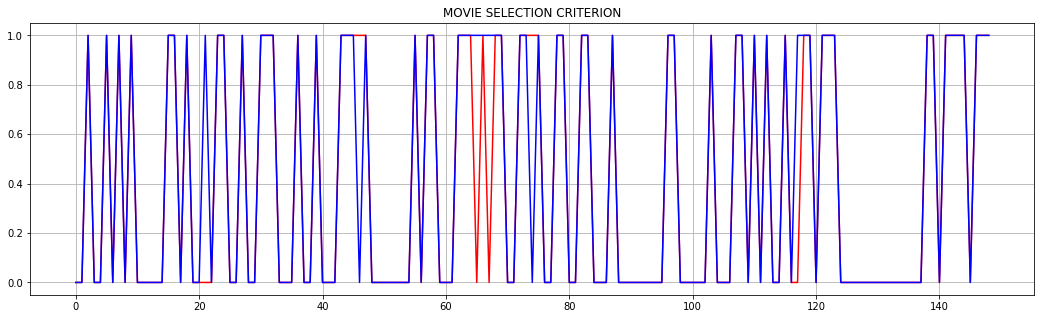

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,5))
plt.plot(a, color='red')
plt.plot(b, color='blue')
plt.grid()
plt.title('MOVIE SELECTION CRITERION')
plt.show()

In [9]:
loss, acc = clf.evaluate(x_train, y_train, verbose=0)

In [10]:
loss

0.09436042731999399

In [11]:
acc

0.97024